In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import AutoMinorLocator

In [3]:
myworkingdirectory = r"C:\Users\Sophie.Kaye\Desktop\NPS Crash Data"
os.chdir(myworkingdirectory)

In [4]:
analysis_2023 = pd.read_csv("./analysis_database_2023.csv")

In [5]:
analysis_2023.shape

(207505, 57)

In [6]:
analysis_2023.head()

,INCID_NO,5_mph,10_mph,15_mph,20_mph,25_mph,30_mph,35_mph,40_mph,45_mph,...,Adverse Weather,LATITUDE,LONGITUDE,Park,RGN,YEAR,MONTH,DOW,HOUR,database
0,ABLI070425075000,0,0,0,0,0,0,0,0,0,...,0.0,NaN,NaN,ABLI,SER,2007.0,4.0,3.0,7.0,CDS
1,ABLI070804175500,1,0,0,0,0,0,0,0,0,...,0.0,NaN,NaN,ABLI,SER,2007.0,8.0,6.0,17.0,CDS
2,ABLI091117170900,0,0,0,0,1,0,0,0,0,...,0.0,NaN,NaN,ABLI,SER,2009.0,11.0,2.0,17.0,CDS
3,ABLI121009110000,0,0,0,0,1,0,0,0,0,...,0.0,NaN,NaN,ABLI,SER,2012.0,10.0,2.0,11.0,CDS
4,ABLI140610163500,0,0,0,0,0,0,0,0,0,...,0.0,38.91205,-76.93412,ABLI,SER,2014.0,6.0,2.0,16.0,CDS


In [7]:
analysis_2023.columns

Index(['INCID_NO', '5_mph', '10_mph', '15_mph', '20_mph', '25_mph', '30_mph',
       '35_mph', '40_mph', '45_mph', '50_mph', '55_mph', '60_mph', '65_mph',
       '70_mph', '75_mph', 'no_posted_speed', 'NUM_VEH', 'Num_Motorcycle',
       'Motorcycle_Ind', 'No Injury', 'Possible Injury',
       'Non-incapacitating Injury', 'Incapacitating Injury', 'Fatality',
       'Num_Motorist', 'Num_Non_Motorist', 'Num_Pedestrian', 'Num_Ped_Deaths',
       'Pedestrian', 'VRU', 'Crash_Severity', 'CrashSeverity_Fatal',
       'CrashSeverity_Incap', 'CrashSeverity_NonIncap',
       'CrashSeverity_Possible', 'CrashSeverity_NoInj', 'First_Harmful_Event',
       'First_Harmful_Event_Type', 'Involving Animal', 'Daylight', 'Dawn',
       'Dusk', 'Dark_Lit', 'Dark_NotLit', 'Dark_UnknownLit', 'Poor Lighting',
       'Adverse Weather', 'LATITUDE', 'LONGITUDE', 'Park', 'RGN', 'YEAR',
       'MONTH', 'DOW', 'HOUR', 'database'],
      dtype='object')

# 3D Surface Plotting

## Total Fatalities

In [23]:
allfatals = analysis_2023[['HOUR','MONTH','Fatality']] # X, Y, Z dimensions of surface plot
allfatals.head()

,HOUR,MONTH,Fatality
0,7.0,4.0,0.0
1,17.0,8.0,0.0
2,17.0,11.0,0.0
3,11.0,10.0,0.0
4,16.0,6.0,0.0


In [24]:
# aggregate all fatalities at same month and hour
allfatals_agg = allfatals.groupby(['MONTH','HOUR']).sum().reset_index()
allfatals_agg.head()

,MONTH,HOUR,Fatality
0,1.0,0.0,0.0
1,1.0,1.0,6.0
2,1.0,2.0,8.0
3,1.0,3.0,2.0
4,1.0,4.0,1.0


In [25]:
# check to make sure this makes sense by looking at only one month
allfatals_Jan = allfatals.loc[allfatals['MONTH']==1.0]
allfatals_Jan.head()

,HOUR,MONTH,Fatality
7,8.0,1.0,0.0
63,8.0,1.0,0.0
119,13.0,1.0,0.0
179,13.0,1.0,0.0
266,0.0,1.0,0.0


In [26]:
allfatals_Jan_agg = allfatals_Jan.groupby(['HOUR']).sum().reset_index()
allfatals_Jan_agg.head() # (ignoring meaningless month sum) matches what we see above - looks good to move forward with allfatals_agg!!

,HOUR,MONTH,Fatality
0,0.0,243.0,0.0
1,1.0,226.0,6.0
2,2.0,195.0,8.0
3,3.0,191.0,2.0
4,4.0,128.0,1.0


In [80]:
allfatals_agg.to_csv("./TotalFatalities_agg.csv",index=False)
allfatals_agg.shape[0] # should have 288 rows for all entries to be filled (24 hours per day * 12 months per year) - looks good!

288

In [81]:
allfatals_agg.Fatality.max()

18.0

In [28]:
# transform the old column name in something numeric
allfatals_agg['HOUR']=pd.Categorical(allfatals_agg['HOUR'])
allfatals_agg['HOUR']=allfatals_agg['HOUR'].cat.codes

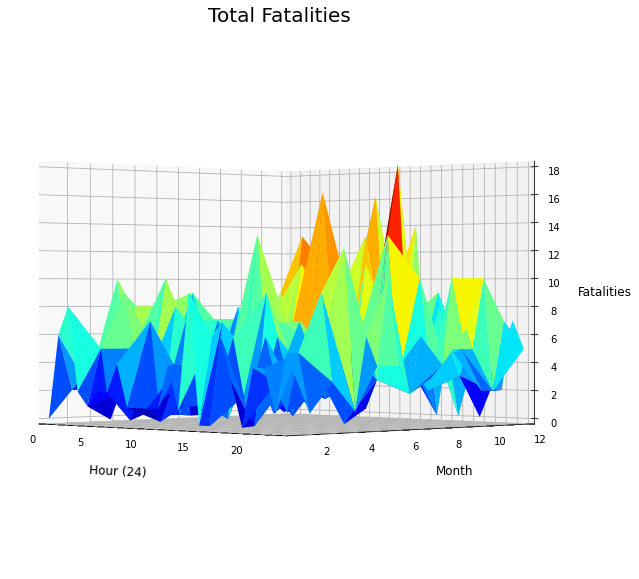

In [52]:
# 3D heatmap, based on this example: https://python-graph-gallery.com/371-surface-plot/
fig = plt.figure(figsize = (30, 10))
ax = fig.gca(projection ='3d')
surf = ax.plot_trisurf(allfatals_agg['HOUR'], allfatals_agg['MONTH'], allfatals_agg['Fatality'], cmap = plt.cm.jet, linewidth = 0.2) # note: jet = color palette, vmax = maximum colormap value
ax.set_title("Total Fatalities", fontsize=20)
ax.set_xlabel("Hour (24)", fontsize = 12, labelpad = 20) # note: 'labelpad' distances text label from tick value labels
ax.set_ylabel("Month", fontsize = 12, labelpad = 20) 
ax.set_zlabel("Fatalities", fontsize = 12, labelpad = 20)
ax.yaxis.set_rotate_label(False)  # disable automatic rotation
ax.zaxis.set_rotate_label(False)  # disable automatic rotation
ax.set_xlim(0, 23)
ax.set_ylim(1, 12)
ax.grid(which ='major', linewsidth = 1.2)
ax.grid(which ='minor', linewidth = 0.6)
ax.minorticks_on()
ax.yaxis.set_minor_locator(AutoMinorLocator(2)) # limit y axis minor ticks to 1 between major ticks
#cb = fig.colorbar(surf, shrink = 0.70, aspect = 8)
#cb.ax.set_title('Fatalities', size = 13)
#cb.ax.tick_params(labelsize = 11)
#ax.view_init(90, 0) # rotate plot for top down view (shows that color is likely rate of change, not # fatalities, thus colorbar code was commented out as the value it represents is confusing)
#ax.view_init(0,-90) # rotate plot for straight on view (best perspective at Z axis with X and Y oriented per FHWA EDC-7 plots) - can confirm fatality values are plotted as expected 
ax.view_init(0,-45) # rotate plot for straight on perspective of Z axis without sacrificing Y axis - this method is likely not the best for visualizing our data
plt.show()

## Number of Crashes Involving Animals

In [32]:
animal = analysis_2023.loc[analysis_2023['Involving Animal']==1.0]
animalcount = animal[['HOUR','MONTH']] # X and Y dimensions of surface plot
animalcount['Count'] = 1 # Z dimension of surface plot
animalcount_agg = animalcount.groupby(['MONTH','HOUR']).sum().reset_index()
animalcount_agg.head()

<ipython-input-32-51eef4c12ed0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  animalcount['Count'] = 1 # Z dimension of surface plot


,MONTH,HOUR,Count
0,1.0,0.0,26
1,1.0,1.0,27
2,1.0,2.0,13
3,1.0,3.0,13
4,1.0,4.0,13


In [33]:
# check to make sure this makes sense by looking at only one month
animalcount_Jan = animalcount.loc[animalcount['MONTH']==1.0]
animalcount_Jan.head()

,HOUR,MONTH,Count
1455,14.0,1.0,1
1521,8.0,1.0,1
1522,9.0,1.0,1
1605,16.0,1.0,1
1686,8.0,1.0,1


In [34]:
animalcount_Jan_agg = animalcount_Jan.groupby(['HOUR']).sum().reset_index()
animalcount_Jan_agg.head() # (ignoring meaningless month sum) matches what we see above - looks good to move forward with animalcount_agg!!

,HOUR,MONTH,Count
0,0.0,26.0,26
1,1.0,27.0,27
2,2.0,13.0,13
3,3.0,13.0,13
4,4.0,13.0,13


In [82]:
animalcount_agg.to_csv("./InvolvingAnimalCount_agg.csv",index=False)
animalcount_agg.shape[0] # should have 288 rows for all entries to be filled (24 hours per day * 12 months per year) - looks good!

288

In [83]:
animalcount_agg.Count.max()

421

In [36]:
# transform the old column name in something numeric
animalcount_agg['HOUR']=pd.Categorical(animalcount_agg['HOUR'])
animalcount_agg['HOUR']=animalcount_agg['HOUR'].cat.codes

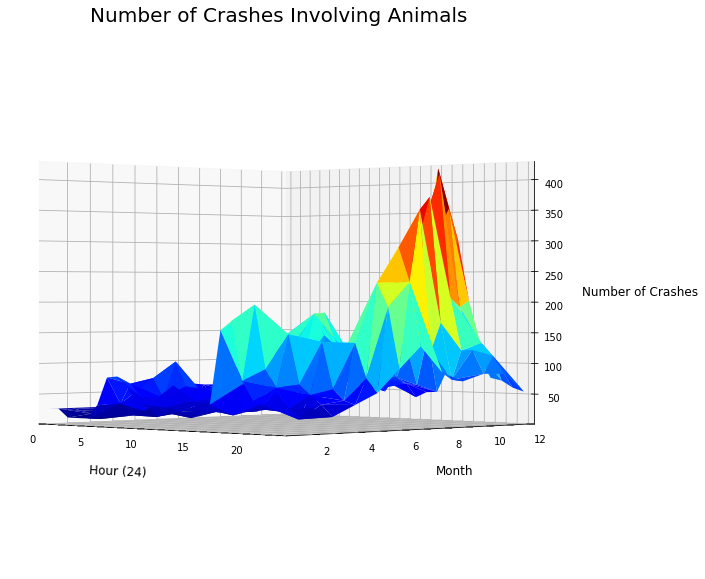

In [53]:
# 3D heatmap, based on this example: https://python-graph-gallery.com/371-surface-plot/
fig = plt.figure(figsize = (30, 10))
ax = fig.gca(projection ='3d')
surf = ax.plot_trisurf(animalcount_agg['HOUR'], animalcount_agg['MONTH'], animalcount_agg['Count'], cmap = plt.cm.jet, linewidth = 0.2) # note: jet = color palette, vmax = maximum colormap value
ax.set_title("Number of Crashes Involving Animals", fontsize=20)
ax.set_xlabel("Hour (24)", fontsize = 12, labelpad = 20) # note: 'labelpad' distances text label from tick value labels
ax.set_ylabel("Month", fontsize = 12, labelpad = 20) 
ax.set_zlabel("Number of Crashes", fontsize = 12, labelpad = 40)
ax.yaxis.set_rotate_label(False)  # disable automatic rotation
ax.zaxis.set_rotate_label(False)  # disable automatic rotation
ax.set_xlim(0, 23)
ax.set_ylim(1, 12)
ax.grid(which ='major', linewsidth = 1.2)
ax.grid(which ='minor', linewidth = 0.6)
ax.minorticks_on()
ax.yaxis.set_minor_locator(AutoMinorLocator(2)) # limit y axis minor ticks to 1 between major ticks
#cb = fig.colorbar(surf, shrink = 0.70, aspect = 8)
#cb.ax.set_title('Number of Crashes', size = 13)
#cb.ax.tick_params(labelsize = 11)
#ax.view_init(90, 0) # rotate plot for top down view (shows that color is likely rate of change, not # crashes, thus colorbar code was commented out as the value it represents is confusing)
#ax.view_init(0,-90) # rotate plot for straight on view (best perspective at Z axis with X and Y oriented per FHWA EDC-7 plots) - can confirm number of crash values are plotted as expected 
ax.view_init(0,-45) # rotate plot for straight on perspective of Z axis without sacrificing Y axis - this method is likely not the best for visualizing our data
plt.show()

## Number of Crashes Involving Motorcycles

In [42]:
motorcycle = analysis_2023.loc[analysis_2023['Motorcycle_Ind']==1.0]
motorcyclecount = motorcycle[['HOUR','MONTH']] # X and Y dimensions of surface plot
motorcyclecount['Count'] = 1 # Z dimension of surface plot
motorcyclecount_agg = motorcyclecount.groupby(['MONTH','HOUR']).sum().reset_index()
motorcyclecount_agg.head()

<ipython-input-42-5afb12c091c2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  motorcyclecount['Count'] = 1 # Z dimension of surface plot


,MONTH,HOUR,Count
0,1.0,0.0,1
1,1.0,4.0,1
2,1.0,5.0,1
3,1.0,6.0,3
4,1.0,7.0,1


In [43]:
# check to make sure this makes sense by looking at only one month
motorcyclecount_Jan = motorcyclecount.loc[motorcyclecount['MONTH']==1.0]
motorcyclecount_Jan.head()

,HOUR,MONTH,Count
1448,12.0,1.0,1
1477,0.0,1.0,1
12544,16.0,1.0,1
17048,11.0,1.0,1
17076,11.0,1.0,1


In [44]:
motorcyclecount_Jan_agg = motorcyclecount_Jan.groupby(['HOUR']).sum().reset_index()
motorcyclecount_Jan_agg.head() # (ignoring meaningless month sum) matches what we see above - looks good to move forward with motorcyclecount_agg!!

,HOUR,MONTH,Count
0,0.0,1.0,1
1,4.0,1.0,1
2,5.0,1.0,1
3,6.0,3.0,3
4,7.0,1.0,1


In [86]:
motorcyclecount_agg.to_csv("./InvolvingMotorcycleCount_agg.csv",index=False)
motorcyclecount_agg.shape[0] # should have 288 rows for all entries to be filled (24 hours per day * 12 months per year) - missing some values, to be filled in manually

265

In [88]:
# upload manually fixed database with 0 crash count row added to fill in missing hours
motorcyclecount_agg = pd.read_csv("./InvolvingMotorcycleCount_agg_manualfix.csv")
motorcyclecount_agg.Count.max()

149

In [89]:
# transform the old column name in something numeric
motorcyclecount_agg['HOUR']=pd.Categorical(motorcyclecount_agg['HOUR'])
motorcyclecount_agg['HOUR']=motorcyclecount_agg['HOUR'].cat.codes

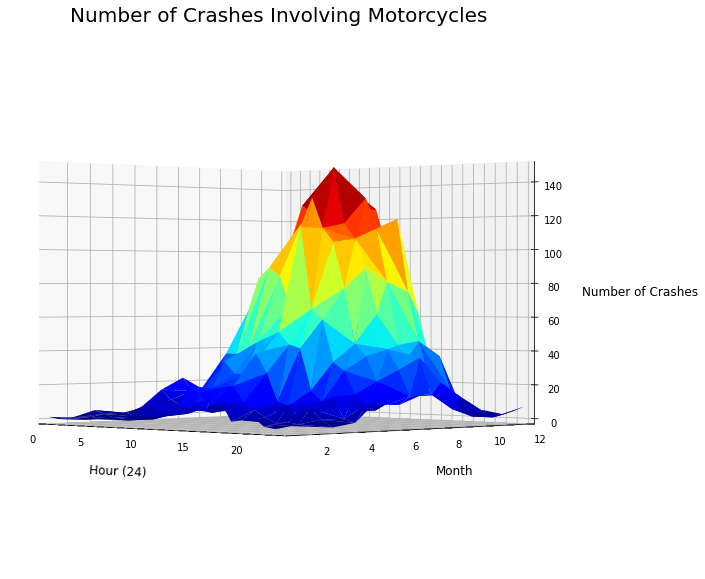

In [92]:
# 3D heatmap, based on this example: https://python-graph-gallery.com/371-surface-plot/
fig = plt.figure(figsize = (30, 10))
ax = fig.gca(projection ='3d')
surf = ax.plot_trisurf(motorcyclecount_agg['HOUR'], motorcyclecount_agg['MONTH'], motorcyclecount_agg['Count'], cmap = plt.cm.jet, linewidth = 0.2) # note: jet = color palette, vmax = maximum colormap value
ax.set_title("Number of Crashes Involving Motorcycles", fontsize=20)
ax.set_xlabel("Hour (24)", fontsize = 12, labelpad = 20) # note: 'labelpad' distances text label from tick value labels
ax.set_ylabel("Month", fontsize = 12, labelpad = 20) 
ax.set_zlabel("Number of Crashes", fontsize = 12, labelpad = 40)
ax.yaxis.set_rotate_label(False)  # disable automatic rotation
ax.zaxis.set_rotate_label(False)  # disable automatic rotation
ax.set_xlim(0, 23)
ax.set_ylim(1, 12)
ax.grid(which ='major', linewsidth = 1.2)
ax.grid(which ='minor', linewidth = 0.6)
ax.minorticks_on()
ax.yaxis.set_minor_locator(AutoMinorLocator(2)) # limit y axis minor ticks to 1 between major ticks
#cb = fig.colorbar(surf, shrink = 0.70, aspect = 8)
#cb.ax.set_title('Number of Crashes', size = 13)
#cb.ax.tick_params(labelsize = 11)
#ax.view_init(90, 0) # rotate plot for top down view (shows that color is likely rate of change, not # crashes, thus colorbar code was commented out as the value it represents is confusing)
#ax.view_init(0,-90) # rotate plot for straight on view (best perspective at Z axis with X and Y oriented per FHWA EDC-7 plots) - can confirm number of crash values are plotted as expected 
ax.view_init(0,-45) # rotate plot for straight on perspective of Z axis without sacrificing Y axis - this method is likely not the best for visualizing our data
plt.show()

## Number of Crashes Involving VRUs

In [97]:
VRU = analysis_2023.loc[analysis_2023['VRU']==1.0]
VRUcount = VRU[['HOUR','MONTH']] # X and Y dimensions of surface plot
VRUcount['Count'] = 1 # Z dimension of surface plot
VRUcount_agg = VRUcount.groupby(['MONTH','HOUR']).sum().reset_index()
VRUcount_agg.head()

<ipython-input-97-57bd9079b99f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  VRUcount['Count'] = 1 # Z dimension of surface plot


,MONTH,HOUR,Count
0,1.0,1.0,3
1,1.0,3.0,1
2,1.0,6.0,5
3,1.0,7.0,4
4,1.0,8.0,4


In [98]:
# check to make sure this makes sense by looking at only one month
VRUcount_Jan = VRUcount.loc[VRUcount['MONTH']==1.0]
VRUcount_Jan.head()

,HOUR,MONTH,Count
9294,8.0,1.0,1
9298,11.0,1.0,1
17854,11.0,1.0,1
22768,18.0,1.0,1
26912,3.0,1.0,1


In [99]:
VRUcount_Jan_agg = VRUcount_Jan.groupby(['HOUR']).sum().reset_index()
VRUcount_Jan_agg.head() # (ignoring meaningless month sum) matches what we see above - looks good to move forward with VRUcount_agg!!

,HOUR,MONTH,Count
0,1.0,3.0,3
1,3.0,1.0,1
2,6.0,5.0,5
3,7.0,4.0,4
4,8.0,4.0,4


In [100]:
VRUcount_agg.to_csv("./InvolvingVRUCount_agg.csv",index=False)
VRUcount_agg.shape[0] # should have 288 rows for all entries to be filled (24 hours per day * 12 months per year) - missing some values, to be filled in manually

245

In [102]:
# upload manually fixed database with 0 crash count row added to fill in missing hours
VRUcount_agg = pd.read_csv("./InvolvingVRUCount_agg_manualfix.csv")
VRUcount_agg.Count.max()

34

In [103]:
# transform the old column name in something numeric
VRUcount_agg['HOUR']=pd.Categorical(VRUcount_agg['HOUR'])
VRUcount_agg['HOUR']=VRUcount_agg['HOUR'].cat.codes

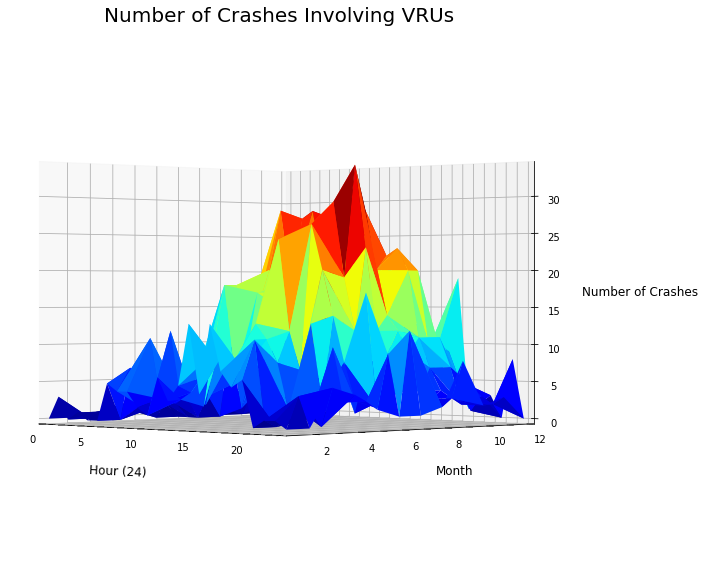

In [104]:
# 3D heatmap, based on this example: https://python-graph-gallery.com/371-surface-plot/
fig = plt.figure(figsize = (30, 10))
ax = fig.gca(projection ='3d')
surf = ax.plot_trisurf(VRUcount_agg['HOUR'], VRUcount_agg['MONTH'], VRUcount_agg['Count'], cmap = plt.cm.jet, linewidth = 0.2) # note: jet = color palette, vmax = maximum colormap value
ax.set_title("Number of Crashes Involving VRUs", fontsize=20)
ax.set_xlabel("Hour (24)", fontsize = 12, labelpad = 20) # note: 'labelpad' distances text label from tick value labels
ax.set_ylabel("Month", fontsize = 12, labelpad = 20) 
ax.set_zlabel("Number of Crashes", fontsize = 12, labelpad = 40)
ax.yaxis.set_rotate_label(False)  # disable automatic rotation
ax.zaxis.set_rotate_label(False)  # disable automatic rotation
ax.set_xlim(0, 23)
ax.set_ylim(1, 12)
ax.grid(which ='major', linewsidth = 1.2)
ax.grid(which ='minor', linewidth = 0.6)
ax.minorticks_on()
ax.yaxis.set_minor_locator(AutoMinorLocator(2)) # limit y axis minor ticks to 1 between major ticks
#cb = fig.colorbar(surf, shrink = 0.70, aspect = 8)
#cb.ax.set_title('Number of Crashes', size = 13)
#cb.ax.tick_params(labelsize = 11)
#ax.view_init(90, 0) # rotate plot for top down view (shows that color is likely rate of change, not # crashes, thus colorbar code was commented out as the value it represents is confusing)
#ax.view_init(0,-90) # rotate plot for straight on view (best perspective at Z axis with X and Y oriented per FHWA EDC-7 plots) - can confirm number of crash values are plotted as expected 
ax.view_init(0,-45) # rotate plot for straight on perspective of Z axis without sacrificing Y axis - this method is likely not the best for visualizing our data
plt.show()

# 2D Heatmap Plotting

## Total Fatalities

In [150]:
# 2D heatmap - requires numpy array of just Z values from  3D plot, see example here: https://datavizpyr.com/heatmap-with-matplotlib-in-python/
# query fatality values for each hour, to become columns of array (months are already in order, so rows of array are all set)
midnight_allfatals = allfatals_agg['Fatality'].loc[allfatals_agg['HOUR']==0.0]
one_allfatals = allfatals_agg['Fatality'].loc[allfatals_agg['HOUR']==1.0]
two_allfatals = allfatals_agg['Fatality'].loc[allfatals_agg['HOUR']==2.0]
three_allfatals = allfatals_agg['Fatality'].loc[allfatals_agg['HOUR']==3.0]
four_allfatals = allfatals_agg['Fatality'].loc[allfatals_agg['HOUR']==4.0]
five_allfatals = allfatals_agg['Fatality'].loc[allfatals_agg['HOUR']==5.0]
six_allfatals = allfatals_agg['Fatality'].loc[allfatals_agg['HOUR']==6.0]
seven_allfatals = allfatals_agg['Fatality'].loc[allfatals_agg['HOUR']==7.0]
eight_allfatals = allfatals_agg['Fatality'].loc[allfatals_agg['HOUR']==8.0]
nine_allfatals = allfatals_agg['Fatality'].loc[allfatals_agg['HOUR']==9.0]
ten_allfatals = allfatals_agg['Fatality'].loc[allfatals_agg['HOUR']==10.0]
eleven_allfatals = allfatals_agg['Fatality'].loc[allfatals_agg['HOUR']==11.0]
twelve_allfatals = allfatals_agg['Fatality'].loc[allfatals_agg['HOUR']==12.0]
thirteen_allfatals = allfatals_agg['Fatality'].loc[allfatals_agg['HOUR']==13.0]
fourteen_allfatals = allfatals_agg['Fatality'].loc[allfatals_agg['HOUR']==14.0]
fifteen_allfatals = allfatals_agg['Fatality'].loc[allfatals_agg['HOUR']==15.0]
sixteen_allfatals = allfatals_agg['Fatality'].loc[allfatals_agg['HOUR']==16.0]
seventeen_allfatals = allfatals_agg['Fatality'].loc[allfatals_agg['HOUR']==17.0]
eighteen_allfatals = allfatals_agg['Fatality'].loc[allfatals_agg['HOUR']==18.0]
nineteen_allfatals = allfatals_agg['Fatality'].loc[allfatals_agg['HOUR']==19.0]
twenty_allfatals = allfatals_agg['Fatality'].loc[allfatals_agg['HOUR']==20.0]
twentyone_allfatals = allfatals_agg['Fatality'].loc[allfatals_agg['HOUR']==21.0]
twentytwo_allfatals = allfatals_agg['Fatality'].loc[allfatals_agg['HOUR']==22.0]
twentythree_allfatals = allfatals_agg['Fatality'].loc[allfatals_agg['HOUR']==23.0]

# combine columns into wide array
allfatals_array = pd.DataFrame(np.column_stack([midnight_allfatals,one_allfatals,two_allfatals,three_allfatals,four_allfatals,five_allfatals,six_allfatals,seven_allfatals,eight_allfatals,nine_allfatals,ten_allfatals,eleven_allfatals,twelve_allfatals,thirteen_allfatals,fourteen_allfatals,fifteen_allfatals,sixteen_allfatals,seventeen_allfatals,eighteen_allfatals,nineteen_allfatals,twenty_allfatals,twentyone_allfatals,twentytwo_allfatals,twentythree_allfatals]), columns=['midnight_allfatals','one_allfatals','two_allfatals','three_allfatals','four_allfatals','five_allfatals','six_allfatals','seven_allfatals','eight_allfatals','nine_allfatals','ten_allfatals','eleven_allfatals','twelve_allfatals','thirteen_allfatals','fourteen_allfatals','fifteen_allfatals','sixteen_allfatals','seventeen_allfatals','eighteen_allfatals','nineteen_allfatals','twenty_allfatals','twentyone_allfatals','twentytwo_allfatals','twentythree_allfatals'])
allfatals_array.head()

,midnight_allfatals,one_allfatals,two_allfatals,three_allfatals,four_allfatals,five_allfatals,six_allfatals,seven_allfatals,eight_allfatals,nine_allfatals,...,fourteen_allfatals,fifteen_allfatals,sixteen_allfatals,seventeen_allfatals,eighteen_allfatals,nineteen_allfatals,twenty_allfatals,twentyone_allfatals,twentytwo_allfatals,twentythree_allfatals
0,0.0,6.0,8.0,2.0,1.0,2.0,2.0,4.0,1.0,1.0,...,9.0,0.0,0.0,6.0,3.0,0.0,4.0,4.0,1.0,5.0
1,2.0,3.0,2.0,5.0,0.0,2.0,0.0,2.0,7.0,0.0,...,6.0,7.0,6.0,2.0,0.0,6.0,3.0,1.0,5.0,1.0
2,4.0,2.0,2.0,9.0,5.0,3.0,4.0,1.0,4.0,1.0,...,2.0,2.0,5.0,9.0,6.0,3.0,7.0,2.0,9.0,3.0
3,10.0,4.0,8.0,6.0,3.0,10.0,8.0,7.0,2.0,1.0,...,13.0,3.0,7.0,5.0,4.0,1.0,3.0,5.0,12.0,1.0
4,7.0,0.0,7.0,8.0,2.0,6.0,3.0,2.0,7.0,0.0,...,5.0,6.0,7.0,6.0,5.0,9.0,0.0,5.0,6.0,4.0


In [151]:
# prep to set index
allfatals_array['month']=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec']
allfatals_array.head()

,midnight_allfatals,one_allfatals,two_allfatals,three_allfatals,four_allfatals,five_allfatals,six_allfatals,seven_allfatals,eight_allfatals,nine_allfatals,...,fifteen_allfatals,sixteen_allfatals,seventeen_allfatals,eighteen_allfatals,nineteen_allfatals,twenty_allfatals,twentyone_allfatals,twentytwo_allfatals,twentythree_allfatals,month
0,0.0,6.0,8.0,2.0,1.0,2.0,2.0,4.0,1.0,1.0,...,0.0,0.0,6.0,3.0,0.0,4.0,4.0,1.0,5.0,Jan
1,2.0,3.0,2.0,5.0,0.0,2.0,0.0,2.0,7.0,0.0,...,7.0,6.0,2.0,0.0,6.0,3.0,1.0,5.0,1.0,Feb
2,4.0,2.0,2.0,9.0,5.0,3.0,4.0,1.0,4.0,1.0,...,2.0,5.0,9.0,6.0,3.0,7.0,2.0,9.0,3.0,Mar
3,10.0,4.0,8.0,6.0,3.0,10.0,8.0,7.0,2.0,1.0,...,3.0,7.0,5.0,4.0,1.0,3.0,5.0,12.0,1.0,Apr
4,7.0,0.0,7.0,8.0,2.0,6.0,3.0,2.0,7.0,0.0,...,6.0,7.0,6.0,5.0,9.0,0.0,5.0,6.0,4.0,May


In [152]:
# set index
allfatals_array = allfatals_array.set_index('month')
allfatals_array.head()

,midnight_allfatals,one_allfatals,two_allfatals,three_allfatals,four_allfatals,five_allfatals,six_allfatals,seven_allfatals,eight_allfatals,nine_allfatals,...,fourteen_allfatals,fifteen_allfatals,sixteen_allfatals,seventeen_allfatals,eighteen_allfatals,nineteen_allfatals,twenty_allfatals,twentyone_allfatals,twentytwo_allfatals,twentythree_allfatals
month,,,,,,,,,,,,,,,,,,,,,
Jan,0.0,6.0,8.0,2.0,1.0,2.0,2.0,4.0,1.0,1.0,...,9.0,0.0,0.0,6.0,3.0,0.0,4.0,4.0,1.0,5.0
Feb,2.0,3.0,2.0,5.0,0.0,2.0,0.0,2.0,7.0,0.0,...,6.0,7.0,6.0,2.0,0.0,6.0,3.0,1.0,5.0,1.0
Mar,4.0,2.0,2.0,9.0,5.0,3.0,4.0,1.0,4.0,1.0,...,2.0,2.0,5.0,9.0,6.0,3.0,7.0,2.0,9.0,3.0
Apr,10.0,4.0,8.0,6.0,3.0,10.0,8.0,7.0,2.0,1.0,...,13.0,3.0,7.0,5.0,4.0,1.0,3.0,5.0,12.0,1.0
May,7.0,0.0,7.0,8.0,2.0,6.0,3.0,2.0,7.0,0.0,...,5.0,6.0,7.0,6.0,5.0,9.0,0.0,5.0,6.0,4.0


In [153]:
allfatals_array.to_csv("./TotalFatalities_array.csv",index=True)

In [109]:
# reverse row index so months match order in FHWA EDC-7 plots
allfatals_array_reorder = np.flipud(allfatals_array)
reordered_array = pd.DataFrame(allfatals_array_reorder)
reordered_array.to_csv('./TotalFatalities_array_reorder.csv', index = True) # check looks good!

Text(0.5, 1.0, 'Total Servicewide Fatalities by Month and Hour')

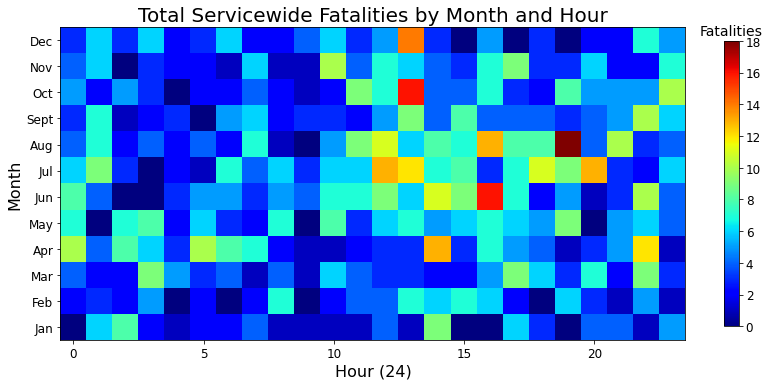

In [110]:
fig, ax = plt.subplots(figsize=(14,7))
im = ax.imshow(allfatals_array_reorder, cmap = "jet") # note: 'jet' is blue to red color gradient
months = ['Dec','Nov','Oct','Sept','Aug','Jul','Jun','May','Apr','Mar','Feb','Jan']
plt.yticks(range(len(months)), months, fontsize = 12)
plt.xticks(fontsize = 12)
cbar = ax.figure.colorbar(im, shrink = 0.75)
cbar.ax.set_title('Fatalities', fontsize = 14)
cbar.ax.tick_params(labelsize=12)
ax.set_xlabel("Hour (24)", fontsize = 16)
ax.set_ylabel("Month", fontsize = 16)
ax.set_title("Total Servicewide Fatalities by Month and Hour", size = 20)

## Number of Crashes Involving Animals

In [111]:
# 2D heatmap - requires numpy array of just Z values from  3D plot, see example here: https://datavizpyr.com/heatmap-with-matplotlib-in-python/
# query Count values for each hour, to become columns of array (months are already in order, so rows of array are all set)
midnight_animalcount = animalcount_agg['Count'].loc[animalcount_agg['HOUR']==0.0]
one_animalcount = animalcount_agg['Count'].loc[animalcount_agg['HOUR']==1.0]
two_animalcount = animalcount_agg['Count'].loc[animalcount_agg['HOUR']==2.0]
three_animalcount = animalcount_agg['Count'].loc[animalcount_agg['HOUR']==3.0]
four_animalcount = animalcount_agg['Count'].loc[animalcount_agg['HOUR']==4.0]
five_animalcount = animalcount_agg['Count'].loc[animalcount_agg['HOUR']==5.0]
six_animalcount = animalcount_agg['Count'].loc[animalcount_agg['HOUR']==6.0]
seven_animalcount = animalcount_agg['Count'].loc[animalcount_agg['HOUR']==7.0]
eight_animalcount = animalcount_agg['Count'].loc[animalcount_agg['HOUR']==8.0]
nine_animalcount = animalcount_agg['Count'].loc[animalcount_agg['HOUR']==9.0]
ten_animalcount = animalcount_agg['Count'].loc[animalcount_agg['HOUR']==10.0]
eleven_animalcount = animalcount_agg['Count'].loc[animalcount_agg['HOUR']==11.0]
twelve_animalcount = animalcount_agg['Count'].loc[animalcount_agg['HOUR']==12.0]
thirteen_animalcount = animalcount_agg['Count'].loc[animalcount_agg['HOUR']==13.0]
fourteen_animalcount = animalcount_agg['Count'].loc[animalcount_agg['HOUR']==14.0]
fifteen_animalcount = animalcount_agg['Count'].loc[animalcount_agg['HOUR']==15.0]
sixteen_animalcount = animalcount_agg['Count'].loc[animalcount_agg['HOUR']==16.0]
seventeen_animalcount = animalcount_agg['Count'].loc[animalcount_agg['HOUR']==17.0]
eighteen_animalcount = animalcount_agg['Count'].loc[animalcount_agg['HOUR']==18.0]
nineteen_animalcount = animalcount_agg['Count'].loc[animalcount_agg['HOUR']==19.0]
twenty_animalcount = animalcount_agg['Count'].loc[animalcount_agg['HOUR']==20.0]
twentyone_animalcount = animalcount_agg['Count'].loc[animalcount_agg['HOUR']==21.0]
twentytwo_animalcount = animalcount_agg['Count'].loc[animalcount_agg['HOUR']==22.0]
twentythree_animalcount = animalcount_agg['Count'].loc[animalcount_agg['HOUR']==23.0]

# combine columns into wide array
animalcount_array = pd.DataFrame(np.column_stack([midnight_animalcount,one_animalcount,two_animalcount,three_animalcount,four_animalcount,five_animalcount,six_animalcount,seven_animalcount,eight_animalcount,nine_animalcount,ten_animalcount,eleven_animalcount,twelve_animalcount,thirteen_animalcount,fourteen_animalcount,fifteen_animalcount,sixteen_animalcount,seventeen_animalcount,eighteen_animalcount,nineteen_animalcount,twenty_animalcount,twentyone_animalcount,twentytwo_animalcount,twentythree_animalcount]), columns=['midnight_animalcount','one_animalcount','two_animalcount','three_animalcount','four_animalcount','five_animalcount','six_animalcount','seven_animalcount','eight_animalcount','nine_animalcount','ten_animalcount','eleven_animalcount','twelve_animalcount','thirteen_animalcount','fourteen_animalcount','fifteen_animalcount','sixteen_animalcount','seventeen_animalcount','eighteen_animalcount','nineteen_animalcount','twenty_animalcount','twentyone_animalcount','twentytwo_animalcount','twentythree_animalcount'])
animalcount_array.head()

,midnight_animalcount,one_animalcount,two_animalcount,three_animalcount,four_animalcount,five_animalcount,six_animalcount,seven_animalcount,eight_animalcount,nine_animalcount,...,fourteen_animalcount,fifteen_animalcount,sixteen_animalcount,seventeen_animalcount,eighteen_animalcount,nineteen_animalcount,twenty_animalcount,twentyone_animalcount,twentytwo_animalcount,twentythree_animalcount
0,26,27,13,13,13,35,80,82,66,39,...,25,35,43,158,172,81,51,45,64,39
1,26,22,18,10,15,36,69,49,38,29,...,31,28,25,75,197,98,70,38,23,42
2,26,23,23,14,15,23,77,45,66,39,...,31,28,34,45,149,151,74,58,44,26
3,25,36,14,25,11,39,103,63,32,26,...,27,40,33,27,45,82,139,66,49,43
4,41,30,29,22,16,57,59,57,50,59,...,55,72,46,58,52,81,124,137,82,60


In [112]:
# prep to set index
animalcount_array['month']=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec']
animalcount_array.head()

,midnight_animalcount,one_animalcount,two_animalcount,three_animalcount,four_animalcount,five_animalcount,six_animalcount,seven_animalcount,eight_animalcount,nine_animalcount,...,fifteen_animalcount,sixteen_animalcount,seventeen_animalcount,eighteen_animalcount,nineteen_animalcount,twenty_animalcount,twentyone_animalcount,twentytwo_animalcount,twentythree_animalcount,month
0,26,27,13,13,13,35,80,82,66,39,...,35,43,158,172,81,51,45,64,39,Jan
1,26,22,18,10,15,36,69,49,38,29,...,28,25,75,197,98,70,38,23,42,Feb
2,26,23,23,14,15,23,77,45,66,39,...,28,34,45,149,151,74,58,44,26,Mar
3,25,36,14,25,11,39,103,63,32,26,...,40,33,27,45,82,139,66,49,43,Apr
4,41,30,29,22,16,57,59,57,50,59,...,72,46,58,52,81,124,137,82,60,May


In [113]:
# set index
animalcount_array = animalcount_array.set_index('month')
animalcount_array.head()

,midnight_animalcount,one_animalcount,two_animalcount,three_animalcount,four_animalcount,five_animalcount,six_animalcount,seven_animalcount,eight_animalcount,nine_animalcount,...,fourteen_animalcount,fifteen_animalcount,sixteen_animalcount,seventeen_animalcount,eighteen_animalcount,nineteen_animalcount,twenty_animalcount,twentyone_animalcount,twentytwo_animalcount,twentythree_animalcount
month,,,,,,,,,,,,,,,,,,,,,
Jan,26,27,13,13,13,35,80,82,66,39,...,25,35,43,158,172,81,51,45,64,39
Feb,26,22,18,10,15,36,69,49,38,29,...,31,28,25,75,197,98,70,38,23,42
Mar,26,23,23,14,15,23,77,45,66,39,...,31,28,34,45,149,151,74,58,44,26
Apr,25,36,14,25,11,39,103,63,32,26,...,27,40,33,27,45,82,139,66,49,43
May,41,30,29,22,16,57,59,57,50,59,...,55,72,46,58,52,81,124,137,82,60


In [114]:
animalcount_array.to_csv("./InvolvingAnimalCount_array.csv",index=True)

In [115]:
# reverse row index so months match order in FHWA EDC-7 plots
animalcount_array_reorder = np.flipud(animalcount_array)
reordered_array = pd.DataFrame(animalcount_array_reorder)
reordered_array.to_csv('./InvolvingAnimalCount_array_reorder.csv', index = True) # check looks good!

Text(0.5, 1.0, 'Number of Crashes Involving Animals by Month and Hour')

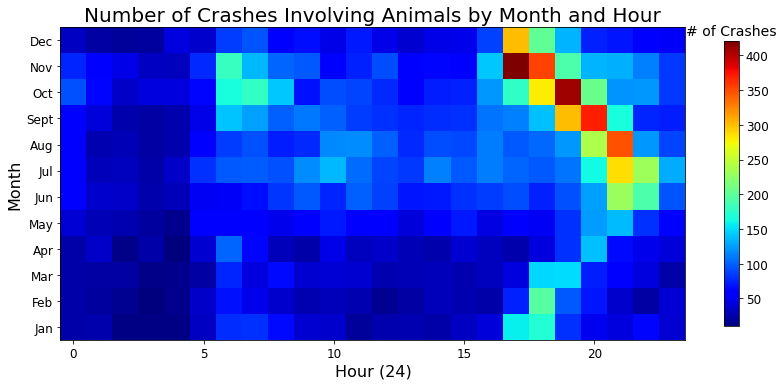

In [124]:
fig, ax = plt.subplots(figsize=(14,7))
im = ax.imshow(animalcount_array_reorder, cmap = "jet") # note: 'jet' is blue to red color gradient
months = ['Dec','Nov','Oct','Sept','Aug','Jul','Jun','May','Apr','Mar','Feb','Jan']
plt.yticks(range(len(months)), months, fontsize = 12)
plt.xticks(fontsize = 12)
cbar = ax.figure.colorbar(im, shrink = 0.75)
cbar.ax.set_title('# of Crashes', fontsize = 14)
cbar.ax.tick_params(labelsize=12)
ax.set_xlabel("Hour (24)", fontsize = 16)
ax.set_ylabel("Month", fontsize = 16)
ax.set_title("Number of Crashes Involving Animals by Month and Hour", size = 20)

## Number of Crashes Involving Motorcycles

In [118]:
# 2D heatmap - requires numpy array of just Z values from  3D plot, see example here: https://datavizpyr.com/heatmap-with-matplotlib-in-python/
# query Count values for each hour, to become columns of array (months are already in order, so rows of array are all set)
midnight_motorcyclecount = motorcyclecount_agg['Count'].loc[motorcyclecount_agg['HOUR']==0.0]
one_motorcyclecount = motorcyclecount_agg['Count'].loc[motorcyclecount_agg['HOUR']==1.0]
two_motorcyclecount = motorcyclecount_agg['Count'].loc[motorcyclecount_agg['HOUR']==2.0]
three_motorcyclecount = motorcyclecount_agg['Count'].loc[motorcyclecount_agg['HOUR']==3.0]
four_motorcyclecount = motorcyclecount_agg['Count'].loc[motorcyclecount_agg['HOUR']==4.0]
five_motorcyclecount = motorcyclecount_agg['Count'].loc[motorcyclecount_agg['HOUR']==5.0]
six_motorcyclecount = motorcyclecount_agg['Count'].loc[motorcyclecount_agg['HOUR']==6.0]
seven_motorcyclecount = motorcyclecount_agg['Count'].loc[motorcyclecount_agg['HOUR']==7.0]
eight_motorcyclecount = motorcyclecount_agg['Count'].loc[motorcyclecount_agg['HOUR']==8.0]
nine_motorcyclecount = motorcyclecount_agg['Count'].loc[motorcyclecount_agg['HOUR']==9.0]
ten_motorcyclecount = motorcyclecount_agg['Count'].loc[motorcyclecount_agg['HOUR']==10.0]
eleven_motorcyclecount = motorcyclecount_agg['Count'].loc[motorcyclecount_agg['HOUR']==11.0]
twelve_motorcyclecount = motorcyclecount_agg['Count'].loc[motorcyclecount_agg['HOUR']==12.0]
thirteen_motorcyclecount = motorcyclecount_agg['Count'].loc[motorcyclecount_agg['HOUR']==13.0]
fourteen_motorcyclecount = motorcyclecount_agg['Count'].loc[motorcyclecount_agg['HOUR']==14.0]
fifteen_motorcyclecount = motorcyclecount_agg['Count'].loc[motorcyclecount_agg['HOUR']==15.0]
sixteen_motorcyclecount = motorcyclecount_agg['Count'].loc[motorcyclecount_agg['HOUR']==16.0]
seventeen_motorcyclecount = motorcyclecount_agg['Count'].loc[motorcyclecount_agg['HOUR']==17.0]
eighteen_motorcyclecount = motorcyclecount_agg['Count'].loc[motorcyclecount_agg['HOUR']==18.0]
nineteen_motorcyclecount = motorcyclecount_agg['Count'].loc[motorcyclecount_agg['HOUR']==19.0]
twenty_motorcyclecount = motorcyclecount_agg['Count'].loc[motorcyclecount_agg['HOUR']==20.0]
twentyone_motorcyclecount = motorcyclecount_agg['Count'].loc[motorcyclecount_agg['HOUR']==21.0]
twentytwo_motorcyclecount = motorcyclecount_agg['Count'].loc[motorcyclecount_agg['HOUR']==22.0]
twentythree_motorcyclecount = motorcyclecount_agg['Count'].loc[motorcyclecount_agg['HOUR']==23.0]

# combine columns into wide array
motorcyclecount_array = pd.DataFrame(np.column_stack([midnight_motorcyclecount,one_motorcyclecount,two_motorcyclecount,three_motorcyclecount,four_motorcyclecount,five_motorcyclecount,six_motorcyclecount,seven_motorcyclecount,eight_motorcyclecount,nine_motorcyclecount,ten_motorcyclecount,eleven_motorcyclecount,twelve_motorcyclecount,thirteen_motorcyclecount,fourteen_motorcyclecount,fifteen_motorcyclecount,sixteen_motorcyclecount,seventeen_motorcyclecount,eighteen_motorcyclecount,nineteen_motorcyclecount,twenty_motorcyclecount,twentyone_motorcyclecount,twentytwo_motorcyclecount,twentythree_motorcyclecount]), columns=['midnight_motorcyclecount','one_motorcyclecount','two_motorcyclecount','three_motorcyclecount','four_motorcyclecount','five_motorcyclecount','six_motorcyclecount','seven_motorcyclecount','eight_motorcyclecount','nine_motorcyclecount','ten_motorcyclecount','eleven_motorcyclecount','twelve_motorcyclecount','thirteen_motorcyclecount','fourteen_motorcyclecount','fifteen_motorcyclecount','sixteen_motorcyclecount','seventeen_motorcyclecount','eighteen_motorcyclecount','nineteen_motorcyclecount','twenty_motorcyclecount','twentyone_motorcyclecount','twentytwo_motorcyclecount','twentythree_motorcyclecount'])
motorcyclecount_array.head()

,midnight_motorcyclecount,one_motorcyclecount,two_motorcyclecount,three_motorcyclecount,four_motorcyclecount,five_motorcyclecount,six_motorcyclecount,seven_motorcyclecount,eight_motorcyclecount,nine_motorcyclecount,...,fourteen_motorcyclecount,fifteen_motorcyclecount,sixteen_motorcyclecount,seventeen_motorcyclecount,eighteen_motorcyclecount,nineteen_motorcyclecount,twenty_motorcyclecount,twentyone_motorcyclecount,twentytwo_motorcyclecount,twentythree_motorcyclecount
0,1,0,0,0,1,1,3,1,2,4,...,22,18,12,14,3,4,6,1,0,2
1,0,1,1,0,0,0,0,1,4,3,...,20,21,22,13,9,5,2,3,2,1
2,4,2,0,0,0,3,0,3,7,9,...,28,28,40,29,13,11,5,10,4,0
3,1,2,0,3,1,1,8,3,13,5,...,46,49,52,45,43,19,13,16,4,2
4,4,7,5,3,6,2,8,12,23,32,...,84,67,112,65,59,35,30,17,11,14


In [119]:
# prep to set index
motorcyclecount_array['month']=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec']
motorcyclecount_array.head()

,midnight_motorcyclecount,one_motorcyclecount,two_motorcyclecount,three_motorcyclecount,four_motorcyclecount,five_motorcyclecount,six_motorcyclecount,seven_motorcyclecount,eight_motorcyclecount,nine_motorcyclecount,...,fifteen_motorcyclecount,sixteen_motorcyclecount,seventeen_motorcyclecount,eighteen_motorcyclecount,nineteen_motorcyclecount,twenty_motorcyclecount,twentyone_motorcyclecount,twentytwo_motorcyclecount,twentythree_motorcyclecount,month
0,1,0,0,0,1,1,3,1,2,4,...,18,12,14,3,4,6,1,0,2,Jan
1,0,1,1,0,0,0,0,1,4,3,...,21,22,13,9,5,2,3,2,1,Feb
2,4,2,0,0,0,3,0,3,7,9,...,28,40,29,13,11,5,10,4,0,Mar
3,1,2,0,3,1,1,8,3,13,5,...,49,52,45,43,19,13,16,4,2,Apr
4,4,7,5,3,6,2,8,12,23,32,...,67,112,65,59,35,30,17,11,14,May


In [120]:
# set index
motorcyclecount_array = motorcyclecount_array.set_index('month')
motorcyclecount_array.head()

,midnight_motorcyclecount,one_motorcyclecount,two_motorcyclecount,three_motorcyclecount,four_motorcyclecount,five_motorcyclecount,six_motorcyclecount,seven_motorcyclecount,eight_motorcyclecount,nine_motorcyclecount,...,fourteen_motorcyclecount,fifteen_motorcyclecount,sixteen_motorcyclecount,seventeen_motorcyclecount,eighteen_motorcyclecount,nineteen_motorcyclecount,twenty_motorcyclecount,twentyone_motorcyclecount,twentytwo_motorcyclecount,twentythree_motorcyclecount
month,,,,,,,,,,,,,,,,,,,,,
Jan,1,0,0,0,1,1,3,1,2,4,...,22,18,12,14,3,4,6,1,0,2
Feb,0,1,1,0,0,0,0,1,4,3,...,20,21,22,13,9,5,2,3,2,1
Mar,4,2,0,0,0,3,0,3,7,9,...,28,28,40,29,13,11,5,10,4,0
Apr,1,2,0,3,1,1,8,3,13,5,...,46,49,52,45,43,19,13,16,4,2
May,4,7,5,3,6,2,8,12,23,32,...,84,67,112,65,59,35,30,17,11,14


In [121]:
motorcyclecount_array.to_csv("./InvolvingMotorcycleCount_array.csv",index=True)

In [122]:
# reverse row index so months match order in FHWA EDC-7 plots
motorcyclecount_array_reorder = np.flipud(motorcyclecount_array)
reordered_array = pd.DataFrame(motorcyclecount_array_reorder)
reordered_array.to_csv('./InvolvingmotorcycleCount_array_reorder.csv', index = True) # check looks good!

Text(0.5, 1.0, 'Number of Crashes Involving Motorcycles by Month and Hour')

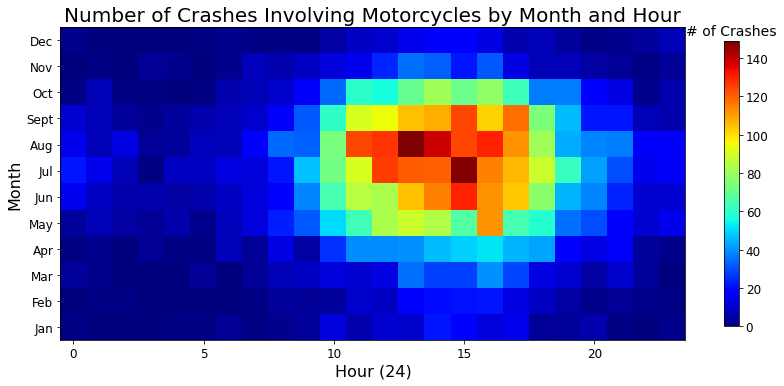

In [123]:
fig, ax = plt.subplots(figsize=(14,7))
im = ax.imshow(motorcyclecount_array_reorder, cmap = "jet") # note: 'jet' is blue to red color gradient
months = ['Dec','Nov','Oct','Sept','Aug','Jul','Jun','May','Apr','Mar','Feb','Jan']
plt.yticks(range(len(months)), months, fontsize = 12)
plt.xticks(fontsize = 12)
cbar = ax.figure.colorbar(im, shrink = 0.75)
cbar.ax.set_title('# of Crashes', fontsize = 14)
cbar.ax.tick_params(labelsize=12)
ax.set_xlabel("Hour (24)", fontsize = 16)
ax.set_ylabel("Month", fontsize = 16)
ax.set_title("Number of Crashes Involving Motorcycles by Month and Hour", size = 20)

## Number of Crashes involving VRUs

In [125]:
# 2D heatmap - requires numpy array of just Z values from  3D plot, see example here: https://datavizpyr.com/heatmap-with-matplotlib-in-python/
# query Count values for each hour, to become columns of array (months are already in order, so rows of array are all set)
midnight_VRUcount = VRUcount_agg['Count'].loc[VRUcount_agg['HOUR']==0.0]
one_VRUcount = VRUcount_agg['Count'].loc[VRUcount_agg['HOUR']==1.0]
two_VRUcount = VRUcount_agg['Count'].loc[VRUcount_agg['HOUR']==2.0]
three_VRUcount = VRUcount_agg['Count'].loc[VRUcount_agg['HOUR']==3.0]
four_VRUcount = VRUcount_agg['Count'].loc[VRUcount_agg['HOUR']==4.0]
five_VRUcount = VRUcount_agg['Count'].loc[VRUcount_agg['HOUR']==5.0]
six_VRUcount = VRUcount_agg['Count'].loc[VRUcount_agg['HOUR']==6.0]
seven_VRUcount = VRUcount_agg['Count'].loc[VRUcount_agg['HOUR']==7.0]
eight_VRUcount = VRUcount_agg['Count'].loc[VRUcount_agg['HOUR']==8.0]
nine_VRUcount = VRUcount_agg['Count'].loc[VRUcount_agg['HOUR']==9.0]
ten_VRUcount = VRUcount_agg['Count'].loc[VRUcount_agg['HOUR']==10.0]
eleven_VRUcount = VRUcount_agg['Count'].loc[VRUcount_agg['HOUR']==11.0]
twelve_VRUcount = VRUcount_agg['Count'].loc[VRUcount_agg['HOUR']==12.0]
thirteen_VRUcount = VRUcount_agg['Count'].loc[VRUcount_agg['HOUR']==13.0]
fourteen_VRUcount = VRUcount_agg['Count'].loc[VRUcount_agg['HOUR']==14.0]
fifteen_VRUcount = VRUcount_agg['Count'].loc[VRUcount_agg['HOUR']==15.0]
sixteen_VRUcount = VRUcount_agg['Count'].loc[VRUcount_agg['HOUR']==16.0]
seventeen_VRUcount = VRUcount_agg['Count'].loc[VRUcount_agg['HOUR']==17.0]
eighteen_VRUcount = VRUcount_agg['Count'].loc[VRUcount_agg['HOUR']==18.0]
nineteen_VRUcount = VRUcount_agg['Count'].loc[VRUcount_agg['HOUR']==19.0]
twenty_VRUcount = VRUcount_agg['Count'].loc[VRUcount_agg['HOUR']==20.0]
twentyone_VRUcount = VRUcount_agg['Count'].loc[VRUcount_agg['HOUR']==21.0]
twentytwo_VRUcount = VRUcount_agg['Count'].loc[VRUcount_agg['HOUR']==22.0]
twentythree_VRUcount = VRUcount_agg['Count'].loc[VRUcount_agg['HOUR']==23.0]

# combine columns into wide array
VRUcount_array = pd.DataFrame(np.column_stack([midnight_VRUcount,one_VRUcount,two_VRUcount,three_VRUcount,four_VRUcount,five_VRUcount,six_VRUcount,seven_VRUcount,eight_VRUcount,nine_VRUcount,ten_VRUcount,eleven_VRUcount,twelve_VRUcount,thirteen_VRUcount,fourteen_VRUcount,fifteen_VRUcount,sixteen_VRUcount,seventeen_VRUcount,eighteen_VRUcount,nineteen_VRUcount,twenty_VRUcount,twentyone_VRUcount,twentytwo_VRUcount,twentythree_VRUcount]), columns=['midnight_VRUcount','one_VRUcount','two_VRUcount','three_VRUcount','four_VRUcount','five_VRUcount','six_VRUcount','seven_VRUcount','eight_VRUcount','nine_VRUcount','ten_VRUcount','eleven_VRUcount','twelve_VRUcount','thirteen_VRUcount','fourteen_VRUcount','fifteen_VRUcount','sixteen_VRUcount','seventeen_VRUcount','eighteen_VRUcount','nineteen_VRUcount','twenty_VRUcount','twentyone_VRUcount','twentytwo_VRUcount','twentythree_VRUcount'])
VRUcount_array.head()

,midnight_VRUcount,one_VRUcount,two_VRUcount,three_VRUcount,four_VRUcount,five_VRUcount,six_VRUcount,seven_VRUcount,eight_VRUcount,nine_VRUcount,...,fourteen_VRUcount,fifteen_VRUcount,sixteen_VRUcount,seventeen_VRUcount,eighteen_VRUcount,nineteen_VRUcount,twenty_VRUcount,twentyone_VRUcount,twentytwo_VRUcount,twentythree_VRUcount
0,0,3,0,1,0,0,5,4,4,2,...,13,4,13,7,5,6,0,1,1,0
1,0,0,0,1,2,0,7,2,11,3,...,9,9,8,7,11,0,0,1,4,0
2,0,1,0,2,1,1,3,4,5,3,...,6,8,13,11,8,2,2,1,0,5
3,0,1,1,1,0,2,2,3,9,2,...,17,16,24,12,7,13,3,10,3,4
4,2,3,1,1,0,0,0,3,7,8,...,18,17,22,26,20,14,8,3,3,2


In [126]:
# prep to set index
VRUcount_array['month']=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec']
VRUcount_array.head()

,midnight_VRUcount,one_VRUcount,two_VRUcount,three_VRUcount,four_VRUcount,five_VRUcount,six_VRUcount,seven_VRUcount,eight_VRUcount,nine_VRUcount,...,fifteen_VRUcount,sixteen_VRUcount,seventeen_VRUcount,eighteen_VRUcount,nineteen_VRUcount,twenty_VRUcount,twentyone_VRUcount,twentytwo_VRUcount,twentythree_VRUcount,month
0,0,3,0,1,0,0,5,4,4,2,...,4,13,7,5,6,0,1,1,0,Jan
1,0,0,0,1,2,0,7,2,11,3,...,9,8,7,11,0,0,1,4,0,Feb
2,0,1,0,2,1,1,3,4,5,3,...,8,13,11,8,2,2,1,0,5,Mar
3,0,1,1,1,0,2,2,3,9,2,...,16,24,12,7,13,3,10,3,4,Apr
4,2,3,1,1,0,0,0,3,7,8,...,17,22,26,20,14,8,3,3,2,May


In [127]:
# set index
VRUcount_array = VRUcount_array.set_index('month')
VRUcount_array.head()

,midnight_VRUcount,one_VRUcount,two_VRUcount,three_VRUcount,four_VRUcount,five_VRUcount,six_VRUcount,seven_VRUcount,eight_VRUcount,nine_VRUcount,...,fourteen_VRUcount,fifteen_VRUcount,sixteen_VRUcount,seventeen_VRUcount,eighteen_VRUcount,nineteen_VRUcount,twenty_VRUcount,twentyone_VRUcount,twentytwo_VRUcount,twentythree_VRUcount
month,,,,,,,,,,,,,,,,,,,,,
Jan,0,3,0,1,0,0,5,4,4,2,...,13,4,13,7,5,6,0,1,1,0
Feb,0,0,0,1,2,0,7,2,11,3,...,9,9,8,7,11,0,0,1,4,0
Mar,0,1,0,2,1,1,3,4,5,3,...,6,8,13,11,8,2,2,1,0,5
Apr,0,1,1,1,0,2,2,3,9,2,...,17,16,24,12,7,13,3,10,3,4
May,2,3,1,1,0,0,0,3,7,8,...,18,17,22,26,20,14,8,3,3,2


In [128]:
VRUcount_array.to_csv("./InvolvingVRUCount_array.csv",index=True)

In [129]:
# reverse row index so months match order in FHWA EDC-7 plots
VRUcount_array_reorder = np.flipud(VRUcount_array)
reordered_array = pd.DataFrame(VRUcount_array_reorder)
reordered_array.to_csv('./InvolvingVRUCount_array_reorder.csv', index = True) # check looks good!

Text(0.5, 1.0, 'Number of Crashes Involving VRUs by Month and Hour')

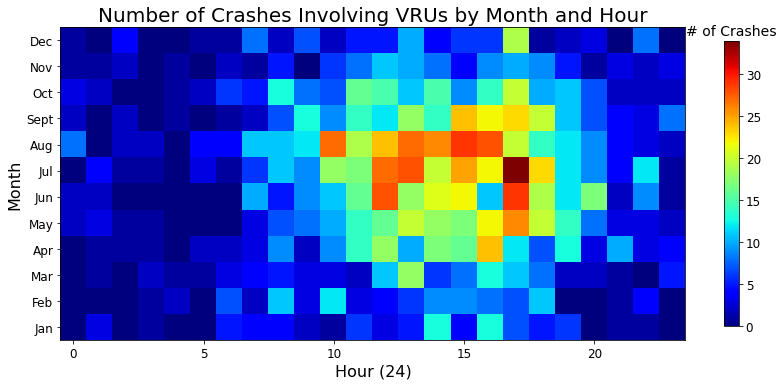

In [130]:
fig, ax = plt.subplots(figsize=(14,7))
im = ax.imshow(VRUcount_array_reorder, cmap = "jet") # note: 'jet' is blue to red color gradient
months = ['Dec','Nov','Oct','Sept','Aug','Jul','Jun','May','Apr','Mar','Feb','Jan']
plt.yticks(range(len(months)), months, fontsize = 12)
plt.xticks(fontsize = 12)
cbar = ax.figure.colorbar(im, shrink = 0.75)
cbar.ax.set_title('# of Crashes', fontsize = 14)
cbar.ax.tick_params(labelsize=12)
ax.set_xlabel("Hour (24)", fontsize = 16)
ax.set_ylabel("Month", fontsize = 16)
ax.set_title("Number of Crashes Involving VRUs by Month and Hour", size = 20)

## Number of Pedestrian Fatalities

In [166]:
pedfatals = analysis_2023[['HOUR','MONTH','Num_Ped_Deaths']]
pedfatals.head()

,HOUR,MONTH,Num_Ped_Deaths
0,7.0,4.0,0
1,17.0,8.0,0
2,17.0,11.0,0
3,11.0,10.0,0
4,16.0,6.0,0


In [167]:
# aggregate all fatalities at same month and hour
pedfatals_agg = pedfatals.groupby(['MONTH','HOUR']).sum().reset_index()
pedfatals_agg.head()

,MONTH,HOUR,Num_Ped_Deaths
0,1.0,0.0,0
1,1.0,1.0,1
2,1.0,2.0,0
3,1.0,3.0,1
4,1.0,4.0,0


In [168]:
# check to make sure this makes sense by looking at only one month
pedfatals_Jan = pedfatals.loc[pedfatals['MONTH']==1.0]
pedfatals_Jan.head()

,HOUR,MONTH,Num_Ped_Deaths
7,8.0,1.0,0
63,8.0,1.0,0
119,13.0,1.0,0
179,13.0,1.0,0
266,0.0,1.0,0


In [169]:
pedfatals_Jan_agg = pedfatals_Jan.groupby(['HOUR']).sum().reset_index()
pedfatals_Jan_agg.head() # (ignoring meaningless month sum) matches what we see above - looks good to move forward with pedfatals_agg!!

,HOUR,MONTH,Num_Ped_Deaths
0,0.0,243.0,0
1,1.0,226.0,1
2,2.0,195.0,0
3,3.0,191.0,1
4,4.0,128.0,0


In [170]:
pedfatals_agg.to_csv("./PedestrianFatalities_agg.csv",index=False)
pedfatals_agg.shape[0] # should have 288 rows for all entries to be filled (24 hours per day * 12 months per year) - looks good!

288

In [171]:
pedfatals_agg['Num_Ped_Deaths'].max()

3

In [172]:
# 2D heatmap - requires numpy array of just Z values from  3D plot, see example here: https://datavizpyr.com/heatmap-with-matplotlib-in-python/
# query Num_Ped_Deaths values for each hour, to become columns of array (months are already in order, so rows of array are all set)
midnight_pedfatals = pedfatals_agg['Num_Ped_Deaths'].loc[pedfatals_agg['HOUR']==0.0]
one_pedfatals = pedfatals_agg['Num_Ped_Deaths'].loc[pedfatals_agg['HOUR']==1.0]
two_pedfatals = pedfatals_agg['Num_Ped_Deaths'].loc[pedfatals_agg['HOUR']==2.0]
three_pedfatals = pedfatals_agg['Num_Ped_Deaths'].loc[pedfatals_agg['HOUR']==3.0]
four_pedfatals = pedfatals_agg['Num_Ped_Deaths'].loc[pedfatals_agg['HOUR']==4.0]
five_pedfatals = pedfatals_agg['Num_Ped_Deaths'].loc[pedfatals_agg['HOUR']==5.0]
six_pedfatals = pedfatals_agg['Num_Ped_Deaths'].loc[pedfatals_agg['HOUR']==6.0]
seven_pedfatals = pedfatals_agg['Num_Ped_Deaths'].loc[pedfatals_agg['HOUR']==7.0]
eight_pedfatals = pedfatals_agg['Num_Ped_Deaths'].loc[pedfatals_agg['HOUR']==8.0]
nine_pedfatals = pedfatals_agg['Num_Ped_Deaths'].loc[pedfatals_agg['HOUR']==9.0]
ten_pedfatals = pedfatals_agg['Num_Ped_Deaths'].loc[pedfatals_agg['HOUR']==10.0]
eleven_pedfatals = pedfatals_agg['Num_Ped_Deaths'].loc[pedfatals_agg['HOUR']==11.0]
twelve_pedfatals = pedfatals_agg['Num_Ped_Deaths'].loc[pedfatals_agg['HOUR']==12.0]
thirteen_pedfatals = pedfatals_agg['Num_Ped_Deaths'].loc[pedfatals_agg['HOUR']==13.0]
fourteen_pedfatals = pedfatals_agg['Num_Ped_Deaths'].loc[pedfatals_agg['HOUR']==14.0]
fifteen_pedfatals = pedfatals_agg['Num_Ped_Deaths'].loc[pedfatals_agg['HOUR']==15.0]
sixteen_pedfatals = pedfatals_agg['Num_Ped_Deaths'].loc[pedfatals_agg['HOUR']==16.0]
seventeen_pedfatals = pedfatals_agg['Num_Ped_Deaths'].loc[pedfatals_agg['HOUR']==17.0]
eighteen_pedfatals = pedfatals_agg['Num_Ped_Deaths'].loc[pedfatals_agg['HOUR']==18.0]
nineteen_pedfatals = pedfatals_agg['Num_Ped_Deaths'].loc[pedfatals_agg['HOUR']==19.0]
twenty_pedfatals = pedfatals_agg['Num_Ped_Deaths'].loc[pedfatals_agg['HOUR']==20.0]
twentyone_pedfatals = pedfatals_agg['Num_Ped_Deaths'].loc[pedfatals_agg['HOUR']==21.0]
twentytwo_pedfatals = pedfatals_agg['Num_Ped_Deaths'].loc[pedfatals_agg['HOUR']==22.0]
twentythree_pedfatals = pedfatals_agg['Num_Ped_Deaths'].loc[pedfatals_agg['HOUR']==23.0]

# combine columns into wide array
pedfatals_array = pd.DataFrame(np.column_stack([midnight_pedfatals,one_pedfatals,two_pedfatals,three_pedfatals,four_pedfatals,five_pedfatals,six_pedfatals,seven_pedfatals,eight_pedfatals,nine_pedfatals,ten_pedfatals,eleven_pedfatals,twelve_pedfatals,thirteen_pedfatals,fourteen_pedfatals,fifteen_pedfatals,sixteen_pedfatals,seventeen_pedfatals,eighteen_pedfatals,nineteen_pedfatals,twenty_pedfatals,twentyone_pedfatals,twentytwo_pedfatals,twentythree_pedfatals]), columns=['midnight_pedfatals','one_pedfatals','two_pedfatals','three_pedfatals','four_pedfatals','five_pedfatals','six_pedfatals','seven_pedfatals','eight_pedfatals','nine_pedfatals','ten_pedfatals','eleven_pedfatals','twelve_pedfatals','thirteen_pedfatals','fourteen_pedfatals','fifteen_pedfatals','sixteen_pedfatals','seventeen_pedfatals','eighteen_pedfatals','nineteen_pedfatals','twenty_pedfatals','twentyone_pedfatals','twentytwo_pedfatals','twentythree_pedfatals'])
pedfatals_array.head()

,midnight_pedfatals,one_pedfatals,two_pedfatals,three_pedfatals,four_pedfatals,five_pedfatals,six_pedfatals,seven_pedfatals,eight_pedfatals,nine_pedfatals,...,fourteen_pedfatals,fifteen_pedfatals,sixteen_pedfatals,seventeen_pedfatals,eighteen_pedfatals,nineteen_pedfatals,twenty_pedfatals,twentyone_pedfatals,twentytwo_pedfatals,twentythree_pedfatals
0,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,2,0,0,0,0,0,0,...,0,0,0,1,2,1,0,0,0,0
3,0,1,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,2,2,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,0


In [173]:
# prep to set index
pedfatals_array['month']=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec']
pedfatals_array.head()

,midnight_pedfatals,one_pedfatals,two_pedfatals,three_pedfatals,four_pedfatals,five_pedfatals,six_pedfatals,seven_pedfatals,eight_pedfatals,nine_pedfatals,...,fifteen_pedfatals,sixteen_pedfatals,seventeen_pedfatals,eighteen_pedfatals,nineteen_pedfatals,twenty_pedfatals,twentyone_pedfatals,twentytwo_pedfatals,twentythree_pedfatals,month
0,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Jan
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Feb
2,0,0,0,2,0,0,0,0,0,0,...,0,0,1,2,1,0,0,0,0,Mar
3,0,1,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,2,2,0,Apr
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,May


In [174]:
# set index
pedfatals_array = pedfatals_array.set_index('month')
pedfatals_array.head()

,midnight_pedfatals,one_pedfatals,two_pedfatals,three_pedfatals,four_pedfatals,five_pedfatals,six_pedfatals,seven_pedfatals,eight_pedfatals,nine_pedfatals,...,fourteen_pedfatals,fifteen_pedfatals,sixteen_pedfatals,seventeen_pedfatals,eighteen_pedfatals,nineteen_pedfatals,twenty_pedfatals,twentyone_pedfatals,twentytwo_pedfatals,twentythree_pedfatals
month,,,,,,,,,,,,,,,,,,,,,
Jan,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Feb,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Mar,0,0,0,2,0,0,0,0,0,0,...,0,0,0,1,2,1,0,0,0,0
Apr,0,1,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,2,2,0
May,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,0


In [175]:
pedfatals_array.to_csv("./PedestrianFatalities_array.csv",index=True)

In [176]:
# reverse row index so months match order in FHWA EDC-7 plots
pedfatals_array_reorder = np.flipud(pedfatals_array)
reordered_array = pd.DataFrame(pedfatals_array_reorder)
reordered_array.to_csv('./PedestrianFatalities_array_reorder.csv', index = True) # check looks good!

Text(0.5, 1.0, 'Servicewide Pedestrian Fatalities by Month and Hour')

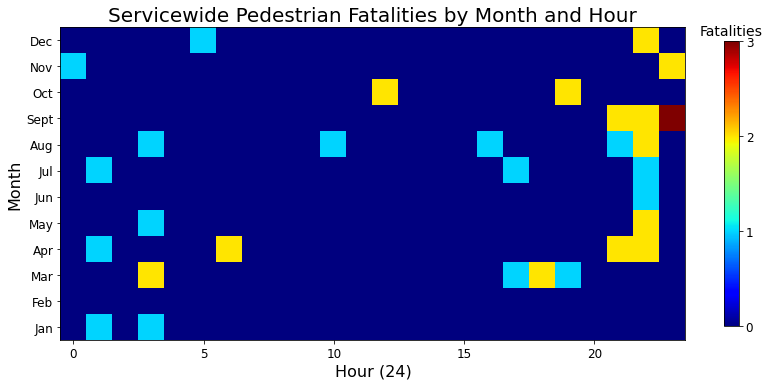

In [177]:
fig, ax = plt.subplots(figsize=(14,7))
im = ax.imshow(pedfatals_array_reorder, cmap = "jet") # note: 'jet' is blue to red color gradient
months = ['Dec','Nov','Oct','Sept','Aug','Jul','Jun','May','Apr','Mar','Feb','Jan']
plt.yticks(range(len(months)), months, fontsize = 12)
plt.xticks(fontsize = 12)
cbar = ax.figure.colorbar(im, shrink = 0.75)
cbar.ax.set_title('Fatalities', fontsize = 14)
cbar.set_ticks([0,1,2,3])
cbar.ax.tick_params(labelsize=12)
ax.set_xlabel("Hour (24)", fontsize = 16)
ax.set_ylabel("Month", fontsize = 16)
ax.set_title("Servicewide Pedestrian Fatalities by Month and Hour", size = 20)

## Number of Fatalities in Crashes involving Motorcycles (not necessarily motorcyclist fatalities)

In [178]:
motorcyclefatals = motorcycle[['HOUR','MONTH','Fatality']]
motorcyclefatals.head()

,HOUR,MONTH,Fatality
32,13.0,7.0,0.0
37,22.0,8.0,0.0
59,13.0,10.0,0.0
87,13.0,7.0,0.0
92,22.0,8.0,0.0


In [179]:
# aggregate all fatalities at same month and hour
motorcyclefatals_agg = motorcyclefatals.groupby(['MONTH','HOUR']).sum().reset_index()
motorcyclefatals_agg.head()

,MONTH,HOUR,Fatality
0,1.0,0.0,0.0
1,1.0,4.0,0.0
2,1.0,5.0,0.0
3,1.0,6.0,0.0
4,1.0,7.0,0.0


In [180]:
# check to make sure this makes sense by looking at only one month
motorcyclefatals_Jan = motorcyclefatals.loc[motorcyclefatals['MONTH']==1.0]
motorcyclefatals_Jan.head()

,HOUR,MONTH,Fatality
1448,12.0,1.0,0.0
1477,0.0,1.0,0.0
12544,16.0,1.0,0.0
17048,11.0,1.0,0.0
17076,11.0,1.0,0.0


In [181]:
motorcyclefatals_Jan_agg = motorcyclefatals_Jan.groupby(['HOUR']).sum().reset_index()
motorcyclefatals_Jan_agg.head() # (ignoring meaningless month sum) matches what we see above - looks good to move forward with motorcyclefatals_agg!!

,HOUR,MONTH,Fatality
0,0.0,1.0,0.0
1,4.0,1.0,0.0
2,5.0,1.0,0.0
3,6.0,3.0,0.0
4,7.0,1.0,0.0


In [182]:
motorcyclefatals_agg.to_csv("./MotorcycleInvCrashFatalities_agg.csv",index=False)
motorcyclefatals_agg.shape[0] # should have 288 rows for all entries to be filled (24 hours per day * 12 months per year) - missing some values, to be filled in manually

265

In [186]:
# upload manually fixed database with 0 crash count row added to fill in missing hours
motorcyclefatals_agg = pd.read_csv("./MotorcycleInvCrashFatalities_agg_manualfix.csv")
motorcyclefatals_agg.Fatality.max()

6

In [187]:
# 2D heatmap - requires numpy array of just Z values from  3D plot, see example here: https://datavizpyr.com/heatmap-with-matplotlib-in-python/
# query Fatality values for each hour, to become columns of array (months are already in order, so rows of array are all set)
midnight_motorcyclefatals = motorcyclefatals_agg['Fatality'].loc[motorcyclefatals_agg['HOUR']==0.0]
one_motorcyclefatals = motorcyclefatals_agg['Fatality'].loc[motorcyclefatals_agg['HOUR']==1.0]
two_motorcyclefatals = motorcyclefatals_agg['Fatality'].loc[motorcyclefatals_agg['HOUR']==2.0]
three_motorcyclefatals = motorcyclefatals_agg['Fatality'].loc[motorcyclefatals_agg['HOUR']==3.0]
four_motorcyclefatals = motorcyclefatals_agg['Fatality'].loc[motorcyclefatals_agg['HOUR']==4.0]
five_motorcyclefatals = motorcyclefatals_agg['Fatality'].loc[motorcyclefatals_agg['HOUR']==5.0]
six_motorcyclefatals = motorcyclefatals_agg['Fatality'].loc[motorcyclefatals_agg['HOUR']==6.0]
seven_motorcyclefatals = motorcyclefatals_agg['Fatality'].loc[motorcyclefatals_agg['HOUR']==7.0]
eight_motorcyclefatals = motorcyclefatals_agg['Fatality'].loc[motorcyclefatals_agg['HOUR']==8.0]
nine_motorcyclefatals = motorcyclefatals_agg['Fatality'].loc[motorcyclefatals_agg['HOUR']==9.0]
ten_motorcyclefatals = motorcyclefatals_agg['Fatality'].loc[motorcyclefatals_agg['HOUR']==10.0]
eleven_motorcyclefatals = motorcyclefatals_agg['Fatality'].loc[motorcyclefatals_agg['HOUR']==11.0]
twelve_motorcyclefatals = motorcyclefatals_agg['Fatality'].loc[motorcyclefatals_agg['HOUR']==12.0]
thirteen_motorcyclefatals = motorcyclefatals_agg['Fatality'].loc[motorcyclefatals_agg['HOUR']==13.0]
fourteen_motorcyclefatals = motorcyclefatals_agg['Fatality'].loc[motorcyclefatals_agg['HOUR']==14.0]
fifteen_motorcyclefatals = motorcyclefatals_agg['Fatality'].loc[motorcyclefatals_agg['HOUR']==15.0]
sixteen_motorcyclefatals = motorcyclefatals_agg['Fatality'].loc[motorcyclefatals_agg['HOUR']==16.0]
seventeen_motorcyclefatals = motorcyclefatals_agg['Fatality'].loc[motorcyclefatals_agg['HOUR']==17.0]
eighteen_motorcyclefatals = motorcyclefatals_agg['Fatality'].loc[motorcyclefatals_agg['HOUR']==18.0]
nineteen_motorcyclefatals = motorcyclefatals_agg['Fatality'].loc[motorcyclefatals_agg['HOUR']==19.0]
twenty_motorcyclefatals = motorcyclefatals_agg['Fatality'].loc[motorcyclefatals_agg['HOUR']==20.0]
twentyone_motorcyclefatals = motorcyclefatals_agg['Fatality'].loc[motorcyclefatals_agg['HOUR']==21.0]
twentytwo_motorcyclefatals = motorcyclefatals_agg['Fatality'].loc[motorcyclefatals_agg['HOUR']==22.0]
twentythree_motorcyclefatals = motorcyclefatals_agg['Fatality'].loc[motorcyclefatals_agg['HOUR']==23.0]

# combine columns into wide array
motorcyclefatals_array = pd.DataFrame(np.column_stack([midnight_motorcyclefatals,one_motorcyclefatals,two_motorcyclefatals,three_motorcyclefatals,four_motorcyclefatals,five_motorcyclefatals,six_motorcyclefatals,seven_motorcyclefatals,eight_motorcyclefatals,nine_motorcyclefatals,ten_motorcyclefatals,eleven_motorcyclefatals,twelve_motorcyclefatals,thirteen_motorcyclefatals,fourteen_motorcyclefatals,fifteen_motorcyclefatals,sixteen_motorcyclefatals,seventeen_motorcyclefatals,eighteen_motorcyclefatals,nineteen_motorcyclefatals,twenty_motorcyclefatals,twentyone_motorcyclefatals,twentytwo_motorcyclefatals,twentythree_motorcyclefatals]), columns=['midnight_motorcyclefatals','one_motorcyclefatals','two_motorcyclefatals','three_motorcyclefatals','four_motorcyclefatals','five_motorcyclefatals','six_motorcyclefatals','seven_motorcyclefatals','eight_motorcyclefatals','nine_motorcyclefatals','ten_motorcyclefatals','eleven_motorcyclefatals','twelve_motorcyclefatals','thirteen_motorcyclefatals','fourteen_motorcyclefatals','fifteen_motorcyclefatals','sixteen_motorcyclefatals','seventeen_motorcyclefatals','eighteen_motorcyclefatals','nineteen_motorcyclefatals','twenty_motorcyclefatals','twentyone_motorcyclefatals','twentytwo_motorcyclefatals','twentythree_motorcyclefatals'])
motorcyclefatals_array.head()

,midnight_motorcyclefatals,one_motorcyclefatals,two_motorcyclefatals,three_motorcyclefatals,four_motorcyclefatals,five_motorcyclefatals,six_motorcyclefatals,seven_motorcyclefatals,eight_motorcyclefatals,nine_motorcyclefatals,...,fourteen_motorcyclefatals,fifteen_motorcyclefatals,sixteen_motorcyclefatals,seventeen_motorcyclefatals,eighteen_motorcyclefatals,nineteen_motorcyclefatals,twenty_motorcyclefatals,twentyone_motorcyclefatals,twentytwo_motorcyclefatals,twentythree_motorcyclefatals
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,3,0,4,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,3,1,0,0,0,1,0
4,0,0,1,0,0,0,1,0,3,0,...,0,1,0,1,1,0,0,0,0,2


In [188]:
# prep to set index
motorcyclefatals_array['month']=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec']
motorcyclefatals_array.head()

,midnight_motorcyclefatals,one_motorcyclefatals,two_motorcyclefatals,three_motorcyclefatals,four_motorcyclefatals,five_motorcyclefatals,six_motorcyclefatals,seven_motorcyclefatals,eight_motorcyclefatals,nine_motorcyclefatals,...,fifteen_motorcyclefatals,sixteen_motorcyclefatals,seventeen_motorcyclefatals,eighteen_motorcyclefatals,nineteen_motorcyclefatals,twenty_motorcyclefatals,twentyone_motorcyclefatals,twentytwo_motorcyclefatals,twentythree_motorcyclefatals,month
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Jan
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,Feb
2,0,0,0,0,0,0,0,0,0,0,...,0,3,0,4,0,1,0,0,0,Mar
3,0,0,0,0,0,0,0,0,0,0,...,0,0,3,1,0,0,0,1,0,Apr
4,0,0,1,0,0,0,1,0,3,0,...,1,0,1,1,0,0,0,0,2,May


In [189]:
# set index
motorcyclefatals_array = motorcyclefatals_array.set_index('month')
motorcyclefatals_array.head()

,midnight_motorcyclefatals,one_motorcyclefatals,two_motorcyclefatals,three_motorcyclefatals,four_motorcyclefatals,five_motorcyclefatals,six_motorcyclefatals,seven_motorcyclefatals,eight_motorcyclefatals,nine_motorcyclefatals,...,fourteen_motorcyclefatals,fifteen_motorcyclefatals,sixteen_motorcyclefatals,seventeen_motorcyclefatals,eighteen_motorcyclefatals,nineteen_motorcyclefatals,twenty_motorcyclefatals,twentyone_motorcyclefatals,twentytwo_motorcyclefatals,twentythree_motorcyclefatals
month,,,,,,,,,,,,,,,,,,,,,
Jan,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
Feb,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0
Mar,0,0,0,0,0,0,0,0,0,0,...,0,0,3,0,4,0,1,0,0,0
Apr,0,0,0,0,0,0,0,0,0,0,...,0,0,0,3,1,0,0,0,1,0
May,0,0,1,0,0,0,1,0,3,0,...,0,1,0,1,1,0,0,0,0,2


In [190]:
motorcyclefatals_array.to_csv("./MotorcycleInvCrashFatalities_array.csv",index=True)

In [191]:
# reverse row index so months match order in FHWA EDC-7 plots
motorcyclefatals_array_reorder = np.flipud(motorcyclefatals_array)
reordered_array = pd.DataFrame(motorcyclefatals_array_reorder)
reordered_array.to_csv('./MotorcycleInvCrashFatalities_array_reorder.csv', index = True) # check looks good!

Text(0.5, 1.0, 'Servicewide Fatalities from Crashes Involving Motorcycles by Month and Hour')

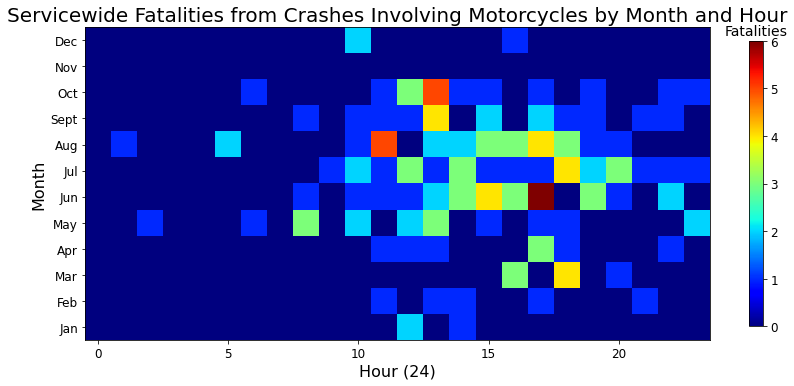

In [192]:
fig, ax = plt.subplots(figsize=(14,7))
im = ax.imshow(motorcyclefatals_array_reorder, cmap = "jet") # note: 'jet' is blue to red color gradient
months = ['Dec','Nov','Oct','Sept','Aug','Jul','Jun','May','Apr','Mar','Feb','Jan']
plt.yticks(range(len(months)), months, fontsize = 12)
plt.xticks(fontsize = 12)
cbar = ax.figure.colorbar(im, shrink = 0.75)
cbar.ax.set_title('Fatalities', fontsize = 14)
cbar.ax.tick_params(labelsize=12)
ax.set_xlabel("Hour (24)", fontsize = 16)
ax.set_ylabel("Month", fontsize = 16)
ax.set_title("Servicewide Fatalities from Crashes Involving Motorcycles by Month and Hour", size = 20)

## Number of Fatalities in Crashes involving Animals (does not include wildlife fatalities)

In [193]:
animalfatals = animal[['HOUR','MONTH','Fatality']]
animalfatals.head()

,HOUR,MONTH,Fatality
50,9.0,9.0,0.0
106,9.0,9.0,0.0
145,21.0,7.0,0.0
166,16.0,8.0,0.0
169,2.0,9.0,0.0


In [194]:
# aggregate all fatalities at same month and hour
animalfatals_agg = animalfatals.groupby(['MONTH','HOUR']).sum().reset_index()
animalfatals_agg.head()

,MONTH,HOUR,Fatality
0,1.0,0.0,0.0
1,1.0,1.0,0.0
2,1.0,2.0,0.0
3,1.0,3.0,0.0
4,1.0,4.0,0.0


In [195]:
# check to make sure this makes sense by looking at only one month
animalfatals_Jan = animalfatals.loc[animalfatals['MONTH']==1.0]
animalfatals_Jan.head()

,HOUR,MONTH,Fatality
1455,14.0,1.0,0.0
1521,8.0,1.0,0.0
1522,9.0,1.0,0.0
1605,16.0,1.0,0.0
1686,8.0,1.0,0.0


In [196]:
animalfatals_Jan_agg = animalfatals_Jan.groupby(['HOUR']).sum().reset_index()
animalfatals_Jan_agg.head() # (ignoring meaningless month sum) matches what we see above - looks good to move forward with animalfatals_agg!!

,HOUR,MONTH,Fatality
0,0.0,26.0,0.0
1,1.0,27.0,0.0
2,2.0,13.0,0.0
3,3.0,13.0,0.0
4,4.0,13.0,0.0


In [197]:
animalfatals_agg.to_csv("./AnimalInvCrashFatalities_agg.csv",index=False)
animalfatals_agg.shape[0] # should have 288 rows for all entries to be filled (24 hours per day * 12 months per year) - looks good!

288

In [198]:
animalfatals_agg.Fatality.max()

3.0

In [199]:
# 2D heatmap - requires numpy array of just Z values from  3D plot, see example here: https://datavizpyr.com/heatmap-with-matplotlib-in-python/
# query Fatality values for each hour, to become columns of array (months are already in order, so rows of array are all set)
midnight_animalfatals = animalfatals_agg['Fatality'].loc[animalfatals_agg['HOUR']==0.0]
one_animalfatals = animalfatals_agg['Fatality'].loc[animalfatals_agg['HOUR']==1.0]
two_animalfatals = animalfatals_agg['Fatality'].loc[animalfatals_agg['HOUR']==2.0]
three_animalfatals = animalfatals_agg['Fatality'].loc[animalfatals_agg['HOUR']==3.0]
four_animalfatals = animalfatals_agg['Fatality'].loc[animalfatals_agg['HOUR']==4.0]
five_animalfatals = animalfatals_agg['Fatality'].loc[animalfatals_agg['HOUR']==5.0]
six_animalfatals = animalfatals_agg['Fatality'].loc[animalfatals_agg['HOUR']==6.0]
seven_animalfatals = animalfatals_agg['Fatality'].loc[animalfatals_agg['HOUR']==7.0]
eight_animalfatals = animalfatals_agg['Fatality'].loc[animalfatals_agg['HOUR']==8.0]
nine_animalfatals = animalfatals_agg['Fatality'].loc[animalfatals_agg['HOUR']==9.0]
ten_animalfatals = animalfatals_agg['Fatality'].loc[animalfatals_agg['HOUR']==10.0]
eleven_animalfatals = animalfatals_agg['Fatality'].loc[animalfatals_agg['HOUR']==11.0]
twelve_animalfatals = animalfatals_agg['Fatality'].loc[animalfatals_agg['HOUR']==12.0]
thirteen_animalfatals = animalfatals_agg['Fatality'].loc[animalfatals_agg['HOUR']==13.0]
fourteen_animalfatals = animalfatals_agg['Fatality'].loc[animalfatals_agg['HOUR']==14.0]
fifteen_animalfatals = animalfatals_agg['Fatality'].loc[animalfatals_agg['HOUR']==15.0]
sixteen_animalfatals = animalfatals_agg['Fatality'].loc[animalfatals_agg['HOUR']==16.0]
seventeen_animalfatals = animalfatals_agg['Fatality'].loc[animalfatals_agg['HOUR']==17.0]
eighteen_animalfatals = animalfatals_agg['Fatality'].loc[animalfatals_agg['HOUR']==18.0]
nineteen_animalfatals = animalfatals_agg['Fatality'].loc[animalfatals_agg['HOUR']==19.0]
twenty_animalfatals = animalfatals_agg['Fatality'].loc[animalfatals_agg['HOUR']==20.0]
twentyone_animalfatals = animalfatals_agg['Fatality'].loc[animalfatals_agg['HOUR']==21.0]
twentytwo_animalfatals = animalfatals_agg['Fatality'].loc[animalfatals_agg['HOUR']==22.0]
twentythree_animalfatals = animalfatals_agg['Fatality'].loc[animalfatals_agg['HOUR']==23.0]

# combine columns into wide array
animalfatals_array = pd.DataFrame(np.column_stack([midnight_animalfatals,one_animalfatals,two_animalfatals,three_animalfatals,four_animalfatals,five_animalfatals,six_animalfatals,seven_animalfatals,eight_animalfatals,nine_animalfatals,ten_animalfatals,eleven_animalfatals,twelve_animalfatals,thirteen_animalfatals,fourteen_animalfatals,fifteen_animalfatals,sixteen_animalfatals,seventeen_animalfatals,eighteen_animalfatals,nineteen_animalfatals,twenty_animalfatals,twentyone_animalfatals,twentytwo_animalfatals,twentythree_animalfatals]), columns=['midnight_animalfatals','one_animalfatals','two_animalfatals','three_animalfatals','four_animalfatals','five_animalfatals','six_animalfatals','seven_animalfatals','eight_animalfatals','nine_animalfatals','ten_animalfatals','eleven_animalfatals','twelve_animalfatals','thirteen_animalfatals','fourteen_animalfatals','fifteen_animalfatals','sixteen_animalfatals','seventeen_animalfatals','eighteen_animalfatals','nineteen_animalfatals','twenty_animalfatals','twentyone_animalfatals','twentytwo_animalfatals','twentythree_animalfatals'])
animalfatals_array.head()

,midnight_animalfatals,one_animalfatals,two_animalfatals,three_animalfatals,four_animalfatals,five_animalfatals,six_animalfatals,seven_animalfatals,eight_animalfatals,nine_animalfatals,...,fourteen_animalfatals,fifteen_animalfatals,sixteen_animalfatals,seventeen_animalfatals,eighteen_animalfatals,nineteen_animalfatals,twenty_animalfatals,twentyone_animalfatals,twentytwo_animalfatals,twentythree_animalfatals
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [200]:
# prep to set index
animalfatals_array['month']=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec']
animalfatals_array.head()

,midnight_animalfatals,one_animalfatals,two_animalfatals,three_animalfatals,four_animalfatals,five_animalfatals,six_animalfatals,seven_animalfatals,eight_animalfatals,nine_animalfatals,...,fifteen_animalfatals,sixteen_animalfatals,seventeen_animalfatals,eighteen_animalfatals,nineteen_animalfatals,twenty_animalfatals,twentyone_animalfatals,twentytwo_animalfatals,twentythree_animalfatals,month
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Jan
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,Feb
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Mar
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Apr
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,May


In [201]:
# set index
animalfatals_array = animalfatals_array.set_index('month')
animalfatals_array.head()

,midnight_animalfatals,one_animalfatals,two_animalfatals,three_animalfatals,four_animalfatals,five_animalfatals,six_animalfatals,seven_animalfatals,eight_animalfatals,nine_animalfatals,...,fourteen_animalfatals,fifteen_animalfatals,sixteen_animalfatals,seventeen_animalfatals,eighteen_animalfatals,nineteen_animalfatals,twenty_animalfatals,twentyone_animalfatals,twentytwo_animalfatals,twentythree_animalfatals
month,,,,,,,,,,,,,,,,,,,,,
Jan,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Feb,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
Mar,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Apr,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
May,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [202]:
animalfatals_array.to_csv("./AnimalInvCrashFatalities_array.csv",index=True)

In [203]:
# reverse row index so months match order in FHWA EDC-7 plots
animalfatals_array_reorder = np.flipud(animalfatals_array)
reordered_array = pd.DataFrame(animalfatals_array_reorder)
reordered_array.to_csv('./AnimalInvCrashFatalities_array_reorder.csv', index = True) # check looks good!

Text(0.5, 1.0, 'Servicewide Fatalities from Crashes Involving Animals by Month and Hour')

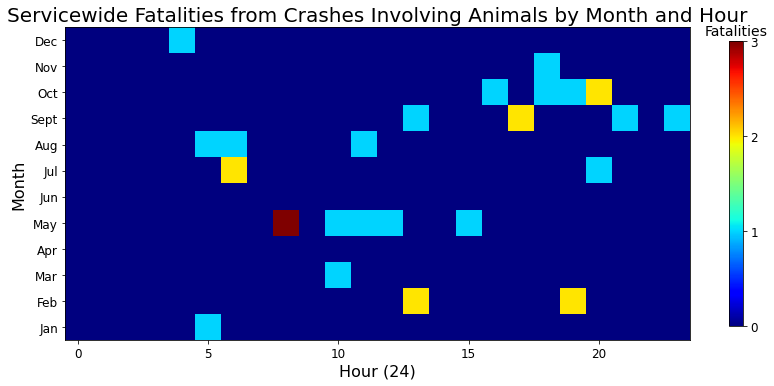

In [205]:
fig, ax = plt.subplots(figsize=(14,7))
im = ax.imshow(animalfatals_array_reorder, cmap = "jet") # note: 'jet' is blue to red color gradient
months = ['Dec','Nov','Oct','Sept','Aug','Jul','Jun','May','Apr','Mar','Feb','Jan']
plt.yticks(range(len(months)), months, fontsize = 12)
plt.xticks(fontsize = 12)
cbar = ax.figure.colorbar(im, shrink = 0.75)
cbar.ax.set_title('Fatalities', fontsize = 14)
cbar.set_ticks([0,1,2,3])
cbar.ax.tick_params(labelsize=12)
ax.set_xlabel("Hour (24)", fontsize = 16)
ax.set_ylabel("Month", fontsize = 16)
ax.set_title("Servicewide Fatalities from Crashes Involving Animals by Month and Hour", size = 20)

# Prep Data Tables

In [5]:
# focus on darkness attributes re: poor visibility
dark = analysis_2023.loc[analysis_2023["Poor Lighting"]==1]
dark.shape[0]

25640

In [26]:
pd.options.display.max_rows = 10000000
# sort by index to make sure that all CDS to Harmful Event were spelled correctly (i.e., no 01. Overturn and 01. Overtrn)
dark['First_Harmful_Event'].value_counts().sort_index() # looks good!

0                                                                          241
01. Overturn/rollover                                                       64
02. Fire/explosion                                                           3
03. Immersion                                                                2
07. Ran off the road right                                                 205
08. Ran Off the road left                                                   88
09. Cross median or centerline                                              18
10. Downhill runaway                                                         1
11. Fell/jumped from motor vehicle                                           3
12. Avoiding an object on road                                              11
13. Avoiding an animal on road                                              19
14. Thrown or falling object                                                 8
16. Other non-collision                             

In [6]:
# add outcome columns to set up analysis data tables
dark['Num_Injuries'] = dark['Possible Injury'] + dark['Non-incapacitating Injury'] + dark['Incapacitating Injury']
dark['Num_Crash'] = 1

<ipython-input-6-5a611c90f16c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dark['Num_Injuries'] = dark['Possible Injury'] + dark['Non-incapacitating Injury'] + dark['Incapacitating Injury']
<ipython-input-6-5a611c90f16c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dark['Num_Crash'] = 1


In [10]:
# check injury sum - looks good
dark['Possible Injury'].head(), dark['Non-incapacitating Injury'].head(), dark['Incapacitating Injury'].head(), dark['Num_Injuries'].head()

(2     0.0
 64    0.0
 69    0.0
 85    1.0
 92    0.0
 Name: Possible Injury, dtype: float64,
 2     0.0
 64    0.0
 69    0.0
 85    0.0
 92    0.0
 Name: Non-incapacitating Injury, dtype: float64,
 2     0.0
 64    0.0
 69    0.0
 85    0.0
 92    0.0
 Name: Incapacitating Injury, dtype: float64,
 2     0.0
 64    0.0
 69    0.0
 85    1.0
 92    0.0
 Name: Num_Injuries, dtype: float64)

## First Harmful Event Type Table

In [19]:
pd.options.display.max_rows = 10000000
dark['First_Harmful_Event_Type'].value_counts()

Collision with person, MV or non-fixed object    11302
Collision with fixed object                       7370
Collision with animals                            4357
Non-collision                                     1680
Unknown                                            929
Name: First_Harmful_Event_Type, dtype: int64

In [62]:
dark_eventtype_outcomes = dark[['Num_Crash','Fatality','Num_Injuries','First_Harmful_Event_Type']] # subset for metrics Wayne is looking for
# outcomes for each first harmful event type, ordered by most to least common in crash report (reset index such that groupby data are now column in dataframe and can be manipulated as such)
dark_eventtype_agg = dark_eventtype_outcomes.groupby(['First_Harmful_Event_Type']).sum().sort_values(by=['Num_Crash'],ascending=False).reset_index()
dark_eventtype_agg.head()

,First_Harmful_Event_Type,Num_Crash,Fatality,Num_Injuries
0,"Collision with person, MV or non-fixed object",11302,80.0,4418.0
1,Collision with fixed object,7370,119.0,2634.0
2,Collision with animals,4357,2.0,343.0
3,Non-collision,1680,26.0,559.0
4,Unknown,929,9.0,221.0


In [50]:
# check sum - looks good!
dark.loc[dark['First_Harmful_Event_Type']=='Collision with fixed object']['Fatality'].sum()

119.0

In [51]:
# check sum - looks good!
dark.loc[dark['First_Harmful_Event_Type']=='Collision with animals']['Num_Injuries'].sum()

343.0

In [65]:
# format data table for display
dark_eventtype_agg = dark_eventtype_agg.rename(columns={'First_Harmful_Event_Type':'First Harmful Event Type','Num_Crash':'# of Crashes','Fatality':"# of Fatalities","Num_Injuries":"# of Injuries"})
dark_eventtype_agg.to_csv("./First Harmful Event Type Outcomes.csv", index=False)

## First Harmful Event Table

In [27]:
pd.options.display.max_rows = 10000000
dark['First_Harmful_Event'].value_counts()

21. Motor vehicle in transport                                           10510
36. Other wild animal (crocodile, birds, coyote, etc.)                    3727
52. Tree/shrub                                                            2767
16. Other non-collision                                                   1256
47. Guardrail/cable face                                                   854
50. Wall                                                                   778
66. Other fixed object                                                     733
25. Other non-fixed object                                                 686
22. Parked motor vehicle                                                   451
28. Deer                                                                   388
45. Ditch                                                                  355
53. Utility pole/light support                                             330
99. Unknown                                         

In [45]:
dark_event_outcomes = dark[['Num_Crash','Fatality','Num_Injuries','First_Harmful_Event']] # subset for metrics Wayne is looking for
# outcomes for each first harmful event, ordered by most to least common in crash report (reset index such that groupby data are now column in dataframe and can be manipulated as such)
dark_event_agg = dark_event_outcomes.groupby(['First_Harmful_Event']).sum().sort_values(by=['Num_Crash'],ascending=False).reset_index()
dark_event_agg['First_Harmful_Event'] = dark_event_agg['First_Harmful_Event'].str.replace('\d+. ', '') # remove "01. " etc. from each First Harmful Event string
dark_event_agg.head()

<ipython-input-45-b2955ebb63bc>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  dark_event_agg['First_Harmful_Event'] = dark_event_agg['First_Harmful_Event'].str.replace('\d+. ', '')


,First_Harmful_Event,Num_Crash,Fatality,Num_Injuries
0,Motor vehicle in transport,10510,58.0,4183.0
1,"Other wild animal (crocodile, birds, coyote, e...",3727,1.0,319.0
2,Tree/shrub,2767,78.0,1254.0
3,Other non-collision,1256,17.0,450.0
4,Guardrail/cable face,854,9.0,230.0


In [28]:
# check sum - looks good!
dark.loc[dark['First_Harmful_Event']=='52. Tree/shrub']['Fatality'].sum()

78.0

In [29]:
# check sum - looks good!
dark.loc[dark['First_Harmful_Event']=='47. Guardrail/cable face']['Num_Injuries'].sum()

230.0

In [66]:
# format data table for display
dark_event_agg = dark_event_agg.rename(columns={'First_Harmful_Event':'First Harmful Event','Num_Crash':'# of Crashes','Fatality':"# of Fatalities","Num_Injuries":"# of Injuries"})
dark_event_agg.to_csv("./First Harmful Event Outcomes.csv", index=False)

## Poor Lighting Attribute Outcomes

In [79]:
darkness = dark[['Dawn', 'Dusk', 'Dark_Lit', 'Dark_NotLit', 'Dark_UnknownLit']]
darkness.sum() # obtain count of each darkness attribute to order following for loop for maximum efficiency

Dawn                1822.0
Dusk                2902.0
Dark_Lit            5848.0
Dark_NotLit        14979.0
Dark_UnknownLit       89.0
dtype: float64

In [84]:
dark['Darkness Attribute'] = 0 # initialize column with dummy data to replace with for loop
length = range(dark.shape[0])
for i in length: # in order of most to least common to speed up processing
    if dark['Dark_NotLit'].iloc[i]==1:
        dark['Darkness Attribute'].iloc[i] = "Dark - NotLit"
    elif dark['Dark_Lit'].iloc[i]==1:
        dark['Darkness Attribute'].iloc[i] = "Dark - Lit"
    elif dark['Dusk'].iloc[i]==1:
        dark['Darkness Attribute'].iloc[i] = "Dusk"
    elif dark['Dawn'].iloc[i]==1:
        dark['Darkness Attribute'].iloc[i] = "Dawn"
    else:
        dark['Darkness Attribute'].iloc[i] = 'Dark - UnknownLit'
        
dark['Darkness Attribute'].value_counts()

<ipython-input-84-a1b652bf712f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dark['Darkness Attribute'] = 0
C:\Users\Sophie.Kaye\Anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\Sophie.Kaye\Anaconda3\lib\site-packages\pandas\core\indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retur

Dark - NotLit        14979
Dark - Lit            5848
Dusk                  2902
Dawn                  1822
Dark - UnknownLit       89
Name: Darkness Attribute, dtype: int64

In [85]:
dark_summary = dark[['Num_Crash','Fatality','Num_Injuries','Darkness Attribute']]
# outcomes for each darkness attribute, ordered by most to least common in crash report (reset index such that groupby data are now column in dataframe and can be manipulated as such)
dark_summary_agg = dark_summary.groupby(['Darkness Attribute']).sum().sort_values(by=['Num_Crash'],ascending=False).reset_index()
dark_summary_agg.head()

,Darkness Attribute,Num_Crash,Fatality,Num_Injuries
0,Dark - NotLit,14979,167.0,5060.0
1,Dark - Lit,5848,36.0,1809.0
2,Dusk,2902,18.0,823.0
3,Dawn,1822,15.0,468.0
4,Dark - UnknownLit,89,0.0,15.0


In [86]:
# check sum - looks good!
dark.loc[dark['Darkness Attribute']=='Dawn']['Fatality'].sum()

15.0

In [87]:
# check sum - looks good!
dark.loc[dark['Darkness Attribute']=='Dusk']['Num_Injuries'].sum()

823.0

In [88]:
# format data table for display
dark_summary_agg = dark_summary_agg.rename(columns={'Num_Crash':'# of Crashes','Fatality':"# of Fatalities","Num_Injuries":"# of Injuries"})
dark_summary_agg.to_csv("./Darkness Attribute Outcomes.csv", index=False)